 # Used Car Price Prediction





#####  변수설명 
* Name : The brand and model of the car.
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type 
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.
* Price



# 1. 데이터 적재 및 파악 

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd 
import numpy as np 

import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 

from IPython.display import set_matplotlib_formats
mpl.rc('font',family='Malgun Gothic')
mpl.rc('axes', unicode_minus = False)
set_matplotlib_formats('retina')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option('display.max.colwidth',100)
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

In [0]:
train = pd.read_csv("/content/drive/My Drive/Kaggle - used-cars-price-prediction/data/used-cars-price-prediction/train-data.csv",sep=',')
train.drop('Unnamed: 0', axis=1, inplace=True)
train.columns = map(str.lower, train.columns)
train.head()

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
name                 6019 non-null object
location             6019 non-null object
year                 6019 non-null int64
kilometers_driven    6019 non-null int64
fuel_type            6019 non-null object
transmission         6019 non-null object
owner_type           6019 non-null object
mileage              6017 non-null object
engine               5983 non-null object
power                5983 non-null object
seats                5977 non-null float64
new_price            824 non-null object
price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [0]:
# 연속형 데이터 확인
train.describe().columns

# 범주형 데이터 확인
train.describe(include='object').columns

Index(['year', 'kilometers_driven', 'seats', 'price'], dtype='object')

Index(['name', 'location', 'fuel_type', 'transmission', 'owner_type',
       'mileage', 'engine', 'power', 'new_price'],
      dtype='object')

In [0]:
train.isna().sum()

name                    0
location                0
year                    0
kilometers_driven       0
fuel_type               0
transmission            0
owner_type              0
mileage                 2
engine                 36
power                  36
seats                  42
new_price            5195
price                   0
dtype: int64

# 2.  EDA + Preprocessing

### Target 변수(Price) 분포 확인

Text(0.5, 0, 'price')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of price')

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


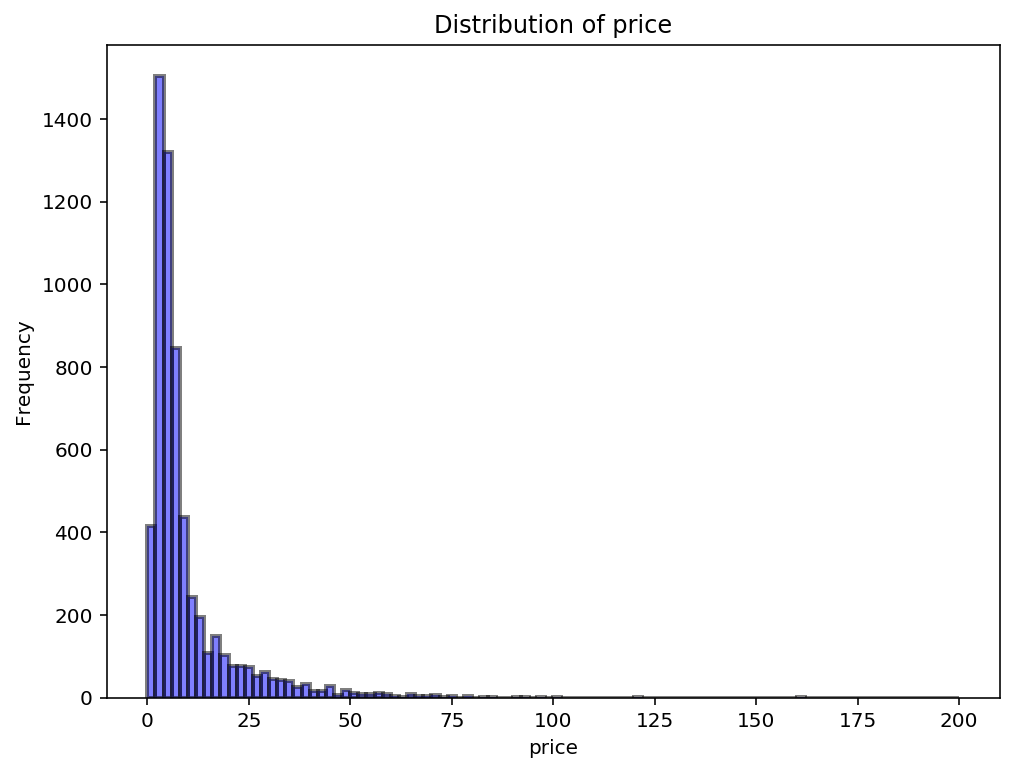

In [0]:
# price 분포 : skewed
# log 조정

train.price.plot.hist(color='blue',figsize=(8,6),bins=100, range=(0,200),alpha=0.5,edgecolor='k',linewidth=2)
plt.xlabel('price'); plt.ylabel('Frequency');
plt.title('Distribution of price')

Text(0.5, 0, 'log_price')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of log price')

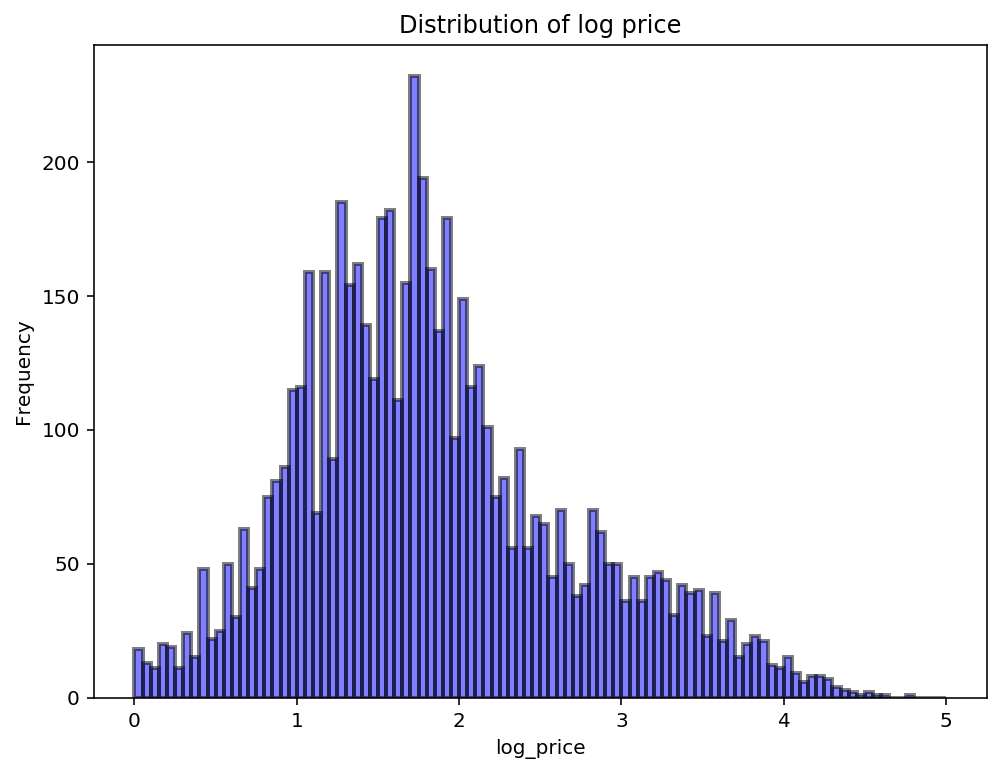

In [0]:
log_price = np.log(train.price)
log_price.plot.hist(color='blue',figsize=(8,6),bins=100, range=(0,5),alpha=0.5,edgecolor='k',linewidth=2)
plt.xlabel('log_price'); plt.ylabel('Frequency');
plt.title('Distribution of log price')

### 중요 텍스트 변수의 변형 (Name - 차량 브랜드와 이름)

In [0]:
# name 변수 -> brand car_name 생성 

split = train.loc[:,'name'].str.split(expand=True)
train['brand_name'] = split[0]

# brand_name 정리 car_name은 비교 후 분리하기 어려워 그대로 유지
train.loc[train['brand_name'] == 'Land','brand_name'] = 'Land Rover'
# train.loc[train['brand_name'] == 'Maruti','brand_name'] = 'Maruti'
train.loc[train['brand_name'] == 'Force','brand_name'] = 'Force One'
train.loc[train['brand_name'] == 'ISUZU','brand_name'] = 'Isuzu'
train.loc[train['brand_name'] == 'Smart','brand_name'] = 'Smart Fortwo'

# car_name 생성 
name_df = train['name'].str.split(' ')
name_split = name_df.apply(lambda x: pd.Series(x))
train['car_name'] = name_split[1]
train.head()

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,brand_name,car_name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,A4


Text(0.5, 1.0, 'Count of Unique Values in Brand name')

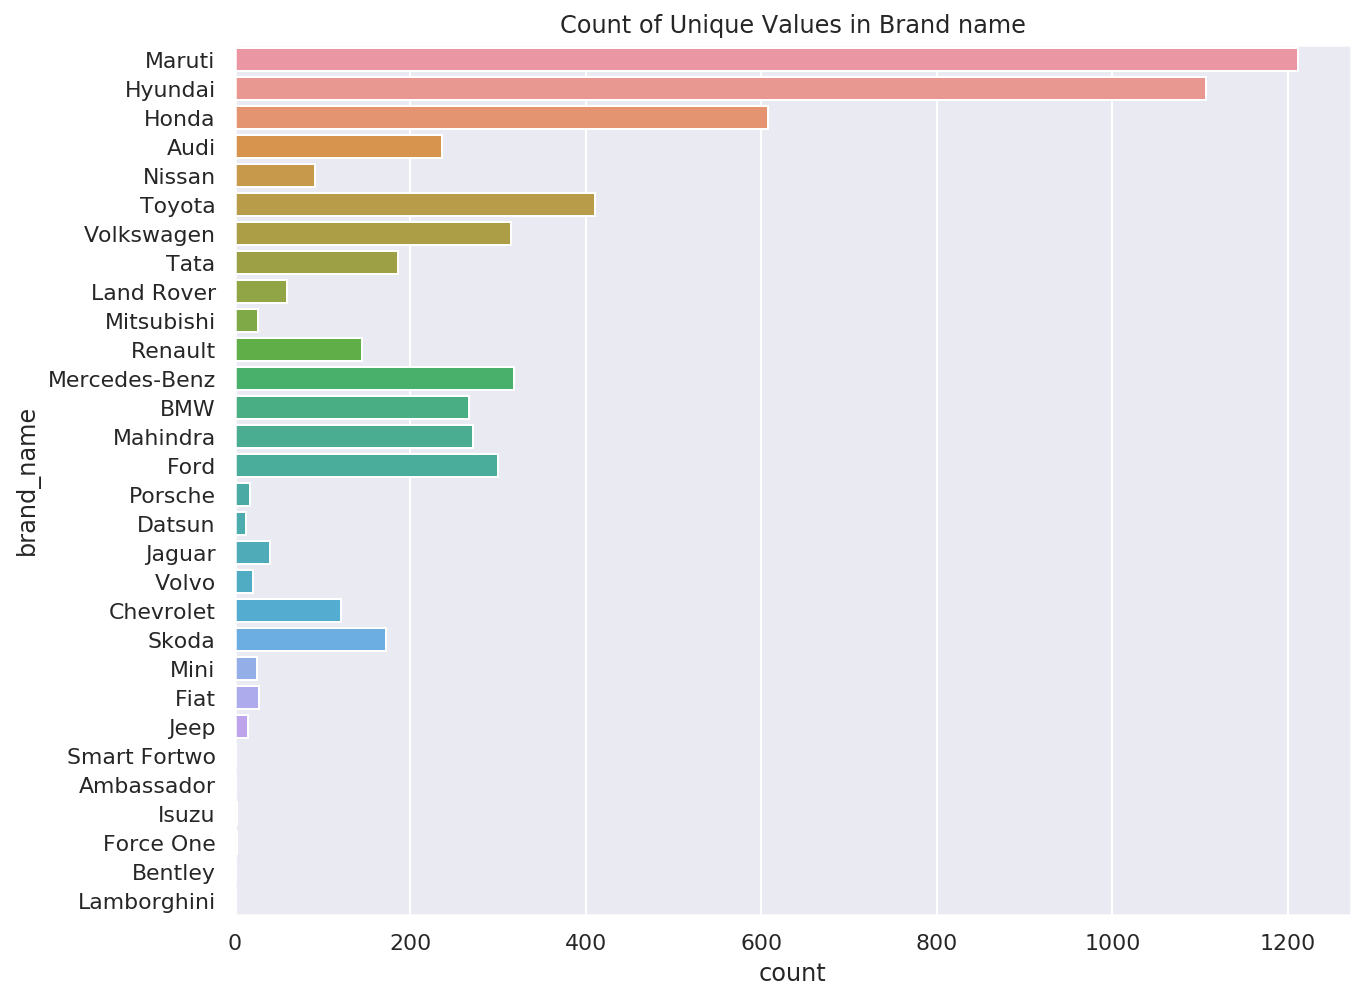

In [0]:
# 변형된 텍스트 변수(브랜드)의 분포 확인

sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(y='brand_name',data=train)
plt.title('Count of Unique Values in Brand name')

### 연속형 변수의 전처리
* year, kilometer_driven, seats, price, mileage, engine, power, new_price

#### year 변수, 2020년을 기준으로 역순 정렬

Text(0.5, 0, 'year')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of year')

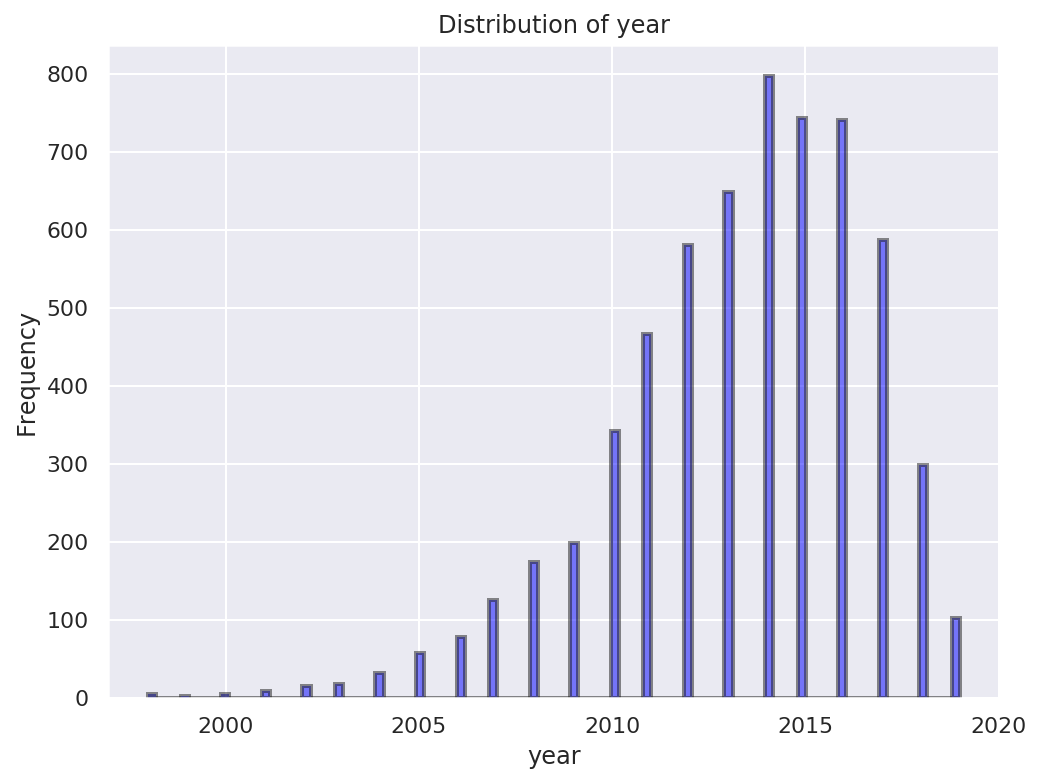

In [0]:
train.year.plot.hist(color='blue',figsize=(8,6),bins=100,alpha=0.5,edgecolor='k',linewidth=2)
plt.xlabel('year'); plt.ylabel('Frequency');
plt.title('Distribution of year')

In [0]:
# year 처리 
import datetime
now = datetime.datetime.now()
train['year'] = train['year'].apply(lambda x : now.year - x)
train.head()

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,brand_name,car_name
0,Maruti Wagon R LXI CNG,Mumbai,10,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,5,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,9,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,8,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,7,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,A4


Text(0.5, 0, 'year')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of year')

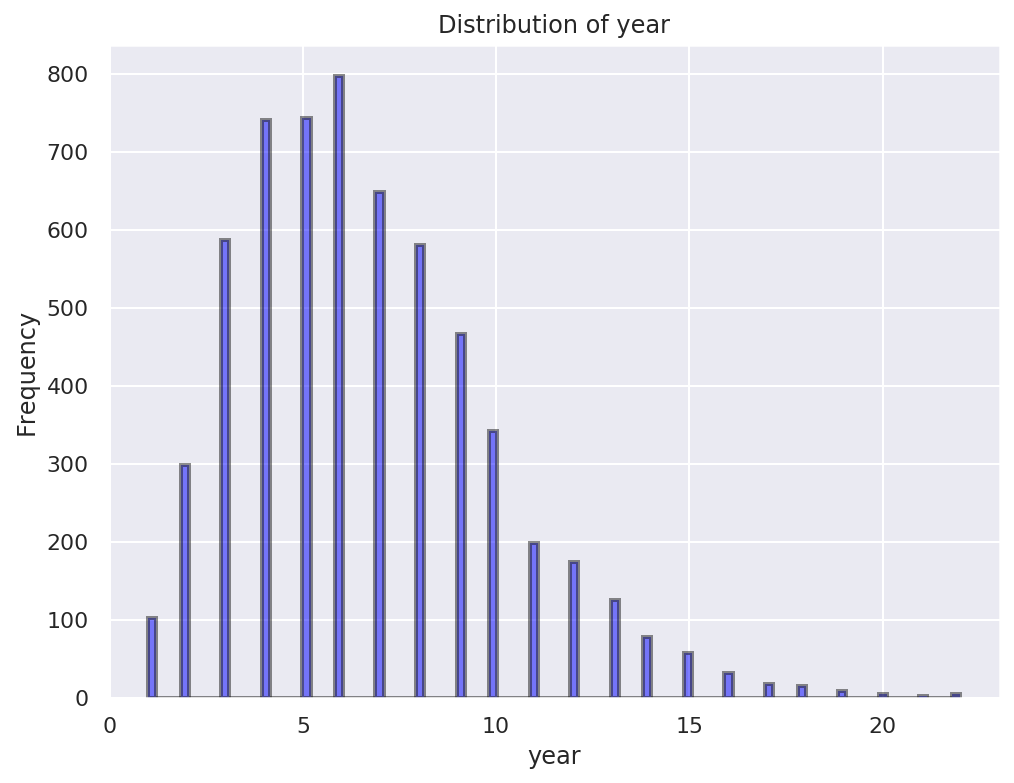

In [0]:
train.year.plot.hist(color='blue',figsize=(8,6),bins=100,alpha=0.5,edgecolor='k',linewidth=2)
plt.xlabel('year'); plt.ylabel('Frequency');
plt.title('Distribution of year')

#### kilometer_driven 변수 이상치 제거, 분포 확인

{'boxes': [<matplotlib.lines.Line2D at 0x7fb3354fc550>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb3354fcf98>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb334c73a58>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb334c736d8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb3354fc898>,
  <matplotlib.lines.Line2D at 0x7fb3354fcc18>]}

Text(0.5, 1.0, 'km_driven box plot')

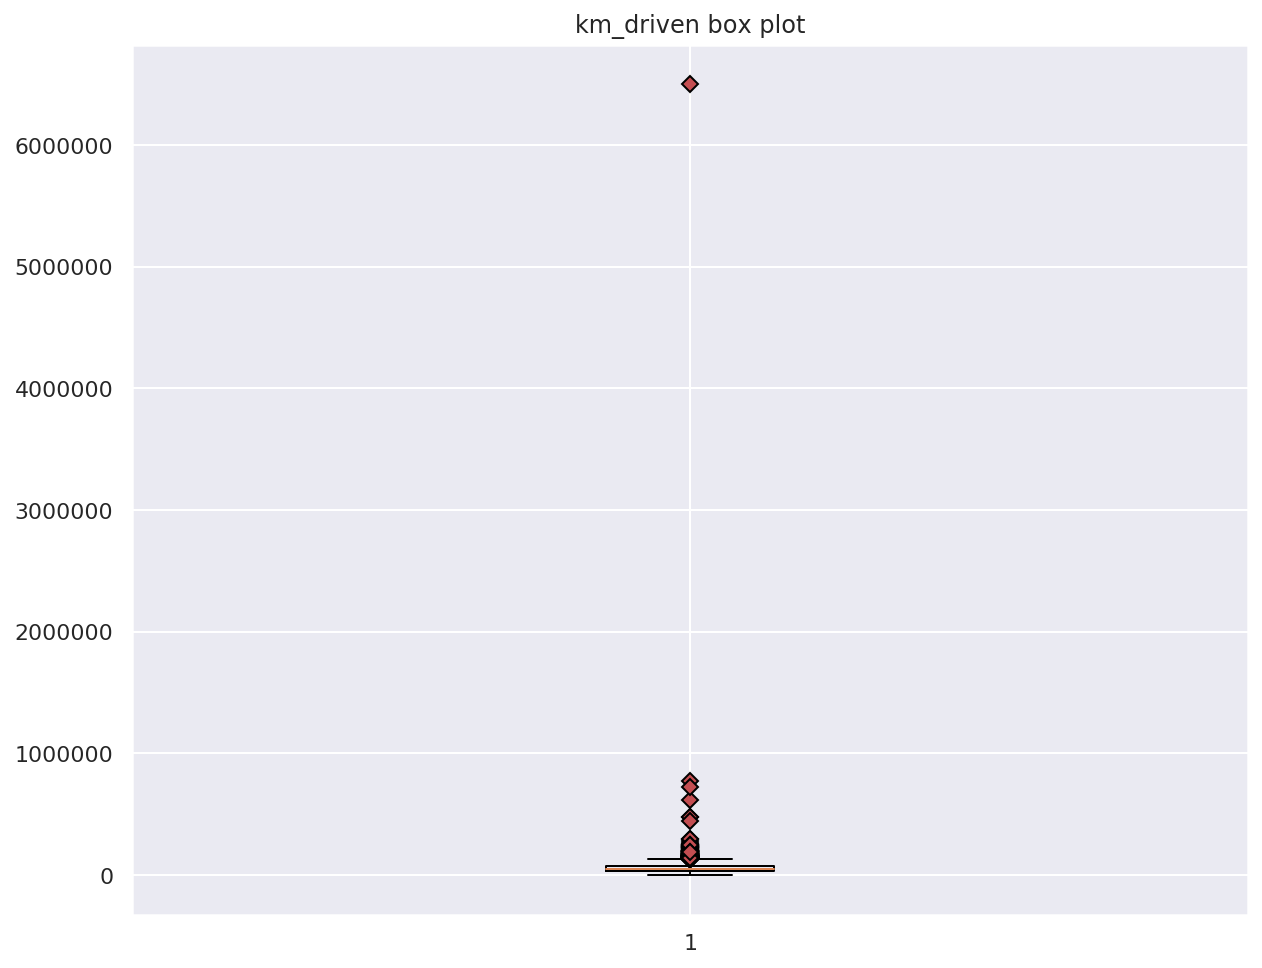

In [0]:
# kilometer_driven 처리

train.rename(columns = {'kilometers_driven' : 'km_driven'}, inplace =True)

# outlier 확인 -> 6500000
red_diamond = dict(markerfacecolor='r', marker='D')
plt.boxplot(train['km_driven'], flierprops=red_diamond)
plt.title("km_driven box plot")
plt.show()

In [0]:
# 아웃라이어 속성 확인

train.loc[train.km_driven>=6000000]

,name,location,year,km_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,brand_name,car_name
2328,BMW X5 xDrive 30d M Sport,Chennai,3,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,NaN,65.0,BMW,X5


In [0]:
# 아웃라이어의 속성이 유사한 차량(BMW, X5 기종 기준)을 탐색하여 적정 km_driven의 값 범위 찾기
## 아웃라이어: year 3, owner_type 1, engine 2993 CC, seats 5, price: 65
## 샘플918: year 4, owner_type 1, engine 2993 CC, , seats 7, price: 58 (km: 76,000)
## 샘플1397: year 4, owner_type 1, engine 2993 CC, seats 7, price:43.78 (km: 35,659)
## 샘플4614: year 3, owner_type 1, engine 2993 CC< seats 5, price: 70 (km:15,000)

train.loc[(train.brand_name == "BMW") & (train.car_name=="X5") & (train.km_driven <= 100000)]

,name,location,year,km_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,brand_name,car_name
168,BMW X5 xDrive 30d,Mumbai,5,41000,Diesel,Automatic,First,15.3 kmpl,2993 CC,258 bhp,5.0,NaN,45.00,BMW,X5
369,BMW X5 3.0d,Bangalore,11,90000,Diesel,Automatic,Second,11.0 kmpl,2993 CC,235 bhp,5.0,NaN,17.75,BMW,X5
516,BMW X5 xDrive 30d,Hyderabad,9,75000,Diesel,Automatic,First,11.7 kmpl,2993 CC,245 bhp,5.0,NaN,27.50,BMW,X5
593,BMW X5 2014-2019 xDrive 30d Design Pure Experience 7 Seater,Mumbai,6,19000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,7.0,NaN,44.00,BMW,X5
712,BMW X5 xDrive 30d Design Pure Experience 5 Seater,Hyderabad,5,69000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,NaN,54.00,BMW,X5
842,BMW X5 2014-2019 xDrive 30d Design Pure Experience 7 Seater,Mumbai,6,47000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,7.0,NaN,41.50,BMW,X5
918,BMW X5 2014-2019 xDrive 30d Design Pure Experience 7 Seater,Hyderabad,4,76000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,7.0,NaN,58.00,BMW,X5
1397,BMW X5 2014-2019 xDrive 30d Design Pure Experience 7 Seater,Kochi,4,35659,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,7.0,NaN,43.78,BMW,X5
1941,BMW X5 xDrive 30d,Mumbai,8,66000,Diesel,Automatic,First,15.3 kmpl,2993 CC,258 bhp,5.0,NaN,21.00,BMW,X5
2311,BMW X5 xDrive 30d,Coimbatore,4,17738,Diesel,Automatic,First,15.3 kmpl,2993 CC,258 bhp,5.0,NaN,54.45,BMW,X5


In [0]:
# 아웃라이어 6,500,000 > 65,000 조정
train.loc[train['km_driven'] == 6500000,'km_driven'] = 65000

Text(0.5, 0, 'kilometers')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of kilometers')

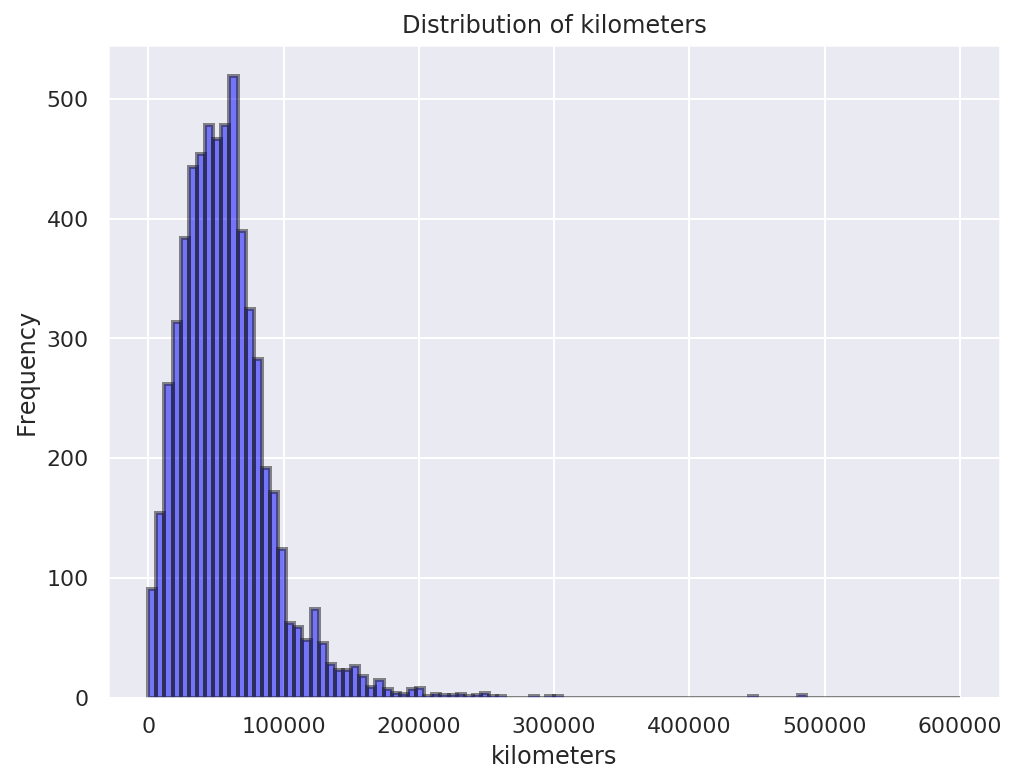

In [0]:
# km_driven 분포 확인: skewed
# log 조정

train.km_driven.plot.hist(color='blue',figsize=(8,6),bins=100, range=(0,600000),alpha=0.5,edgecolor='k',linewidth=2)
plt.xlabel('kilometers'); plt.ylabel('Frequency');
plt.title('Distribution of kilometers')

#### Engine, Mileage, Power 변수

단위 제거, 데이터 타입 변경 및 결측치, 이상치 처리


In [0]:
# mileage / engine / power object -> float 
# pd.to_numeric + errors = 'coerce' : 문자가 포함되어 있는 경우는 강제로 'NaN'
## NaN 처리 되지 않은 결측치가 mileage의 경우 0.0 kmpl, power의 경우 null bhp로 표기되어 이를 모두 숫자형 자료로 전환하여 NaN으로 치환

train['mileage'] = train['mileage'].str.split(expand=True)[0]
train['mileage'] = pd.to_numeric(train['mileage'], errors = 'coerce')

train['engine'] = train['engine'].str.split(expand=True)[0]
train['engine'] = pd.to_numeric(train['engine'], errors = 'coerce')

train['power'] = train['power'].str.split(expand=True)[0]
train['power'] = pd.to_numeric(train['power'], errors = 'coerce')

In [0]:
# mileage 처리

# Electric 삭제 필요 => mileage 결측치 Electric 2개  

train.loc[train['fuel_type'] == 'Electric','mileage']
train.loc[train['fuel_type'] == 'Electric',:]
train.drop(train.loc[train['fuel_type'] == 'Electric',:].index, axis=0, inplace=True)

# 1) 0.0 -> null로 처리 -> car_name 결측처리
null_mileage_car_name = train.loc[train['mileage']== 0.0,'car_name'].unique()
null_mileage_car_name

dic_mileage ={}
for i in null_mileage_car_name : 
  dic_mileage[i] = round(train.loc[train['car_name'] == i, 'mileage'].mean(),2)
# for key, value in dic_mileage.items():
#     print(key, ":", value)

for i in train.loc[train['mileage']== 0.0,'car_name'].unique() :
   train.loc[(train['mileage']== 0.0) & (train['car_name'] == i),'mileage'] = dic_mileage[i]

# 2) car_name 으로도 처리 안된건 -> brand_name 
null_mileage_car_name = train.loc[train['mileage']== 0.0,'brand_name'].unique()

dic_mileage2 ={}
for i in null_mileage_car_name : 
  dic_mileage2[i] = round(train.loc[train['brand_name'] == i, 'mileage'].mean(),2)
# for key, value in dic_mileage2.items():
#     print(key, ":", value)

for i in train.loc[train['mileage']== 0.0,'brand_name'].unique() :
   train.loc[(train['mileage']== 0.0) & (train['brand_name'] == i),'mileage'] = dic_mileage2[i]

# 3) smart(brand_name) / Fortwo (car_name) mileage 값이 없어, 유추 불가능하여, 전체 평균을 넣어 데이터에 최대한 영향을 주지 않도록 함. 
# mean = 18.261020
# train['mileage'].describe() 
train.loc[train['mileage']==0.0,'mileage'] = 18.26

4446   NaN
4904   NaN
Name: mileage, dtype: float64

,name,location,year,km_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,brand_name,car_name
4446,Mahindra E Verito D4,Chennai,4,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58 Lakh,13.00,Mahindra,E
4904,Toyota Prius 2009-2016 Z4,Mumbai,9,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75,Toyota,Prius


array(['Rover', 'C-Class', 'Santro', 'City', 'Figo', 'Jetta', 'New',
       'M-Class', 'Fortwo', 'Baleno', 'Jeep', 'Qualis', 'Superb', 'A7',
       'Siena'], dtype=object)

In [0]:
# engine 결측치 처리 
# -> 결측치가 속한 car_name's 평균 engine 으로 채워넣기.

null_engine_car_name = train.loc[train['engine'].isnull(),'car_name'].unique()
null_engine_car_name

dic_engine ={}
for i in null_engine_car_name : 
  dic_engine[i] = round(train.loc[train['car_name'] == i, 'engine'].mean(),2)
for key, value in dic_engine.items():
    print(key, ":", value)

for i in train.loc[train['engine'].isnull(),'car_name'].unique() :
  #  print(i, train.loc[(train['engine'].isnull()) & (train['car_name'] == i),'engine'], dic_engine[i] )
   train.loc[(train['engine'].isnull()) & (train['car_name'] == i),'engine'] = dic_engine[i]

array(['City', 'Swift', 'Rover', 'Santro', 'Etios', '5', 'Wagon', 'CR-V',
       'Punto', 'Jazz'], dtype=object)

City : 1494.72
Swift : 1240.47
Rover : 2475.72
Santro : 1077.42
Etios : 1373.57
5 : 2359.43
Wagon : 1014.45
CR-V : 2216.69
Punto : 1172.0
Jazz : 1272.33


In [0]:
# power 처리 

null_power_car_name = train.loc[train['power'].isnull(),'car_name'].unique()
# null_power_car_name

dic_power ={}
for i in null_power_car_name : 
  dic_power[i] = round(train.loc[train['car_name'] == i, 'power'].mean(),2)
  
# for key, value in dic_power.items():
#     print(key, ":", value)

for i in train.loc[train['power'].isnull(),'car_name'].unique() : 
  train.loc[(train['power'].isnull()) & (train['car_name'] == i),'power'] = dic_power[i]

# power 결측치 처리 2

null_power_brand_name = train.loc[train['power'].isnull(),'brand_name'].unique()
dic_power2 ={}

for i in null_power_brand_name : 
  dic_power2[i] = round(train.loc[train['brand_name'] == i, 'power'].mean(),2)
  
# for key, value in dic_power2.items():
#     print(key, ":", value)

for i in train.loc[train['power'].isnull(),'brand_name'].unique() : 
  train.loc[(train['power'].isnull()) & (train['brand_name'] == i),'power'] = dic_power2[i]

# smart(brand_name) / Fortwo (car_name) power 값이 없어, 유추 불가능하여, 전체 평균을 넣어 데이터에 최대한 영향을 주지 않도록 함. 
# = 112.731135
# train['power'].describe() 
train['power'].fillna(112.73,inplace=True)
# train.loc[train['power'].isnull(),'power'] = 112.73

#### seats 변수 결측치, 이상치 처리

In [0]:
# seats 처리
# 결측치 

null_seats_car_name = train.loc[train['seats'].isnull(),'car_name'].unique()
print(null_seats_car_name)

dic_seats ={}
for i in null_seats_car_name : 
  dic_seats[i] = train[train['car_name'] == i]['seats'].max()
del dic_seats['Estilo']
dic_seats['Estilo'] = 5.0 # 'Estilo' = 평균 seats 5.0 으로 처리
for key, value in dic_seats.items():
    print(key, ":", value)

try : 
  for i in train.loc[train['seats'].isnull(),'car_name'].unique() :
  #  print(i, train.loc[(train['seats'].isnull()) & (train['car_name'] == i),'seats'], dic_seats[i] )
   train.loc[(train['seats'].isnull()) & (train['car_name'] == i),'seats'] = dic_seats[i]

except KeyError as e : 
  pass

['City' 'Swift' 'Figo' 'Rover' 'Santro' 'Etios' 'Estilo' '5' 'Wagon'
 'Endeavour' 'CR-V' 'Punto' 'Jazz']
City : 5.0
Swift : 5.0
Figo : 5.0
Rover : 7.0
Santro : 5.0
Etios : 5.0
5 : 5.0
Wagon : 5.0
Endeavour : 7.0
CR-V : 5.0
Punto : 5.0
Jazz : 5.0
Estilo : 5.0


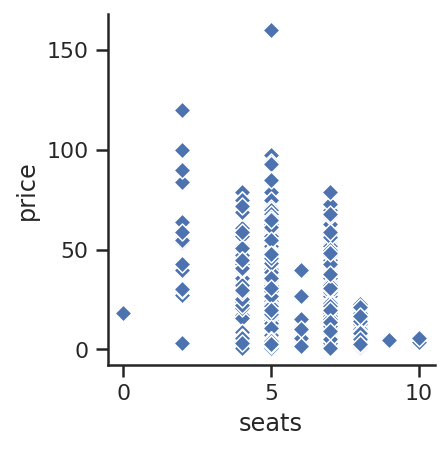

In [0]:
sns.set(style='ticks',color_codes=True)
sns.pairplot(data=train,x_vars=['seats'],y_vars='price',size=3,markers='D',palette='husl')

In [0]:
# 이상치 
# seats = 0 인 name을 확인해 본 후, 해당 name의 차가 없어, car_name을 참고하여 seats를 넣음.

train.loc[train['seats']==0.0,['name','seats']]
train.loc[train['name'] == 'Audi A4 3.2 FSI Tiptronic Quattro','seats']

train.loc[train['seats']==0.0,['name','seats','car_name']]
train.loc[train['car_name'] == 'A4','seats'].head()
# 5개로 확인
train.loc[train['seats']==0.0,'seats'] = 5.0

,name,seats
3999,Audi A4 3.2 FSI Tiptronic Quattro,0.0


3999    0.0
Name: seats, dtype: float64

,name,seats,car_name
3999,Audi A4 3.2 FSI Tiptronic Quattro,0.0,A4


4      5.0
50     5.0
65     5.0
103    5.0
150    5.0
Name: seats, dtype: float64

new_price : 결측치 多 -> 파생변수 Idea

In [0]:
# new_price 처리 
# 1) 값 결측 없는거 ->1 ,  값 결측 있는거 -> 0
train["yn_new_price"] = train['new_price'].notnull().astype(int)

# 2) 결측치 너무 많아서, 의미없는 변수라고 판단
# train.drop('new_price',axis=1,inplace=True)

#### price 변수: 타겟값, 결측치 처리

{'boxes': [<matplotlib.lines.Line2D at 0x7fb33521a198>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb3351f2f28>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb3352159e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb3351f2128>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb335219e48>,
  <matplotlib.lines.Line2D at 0x7fb335219668>]}

Text(0.5, 1.0, 'price box plot')

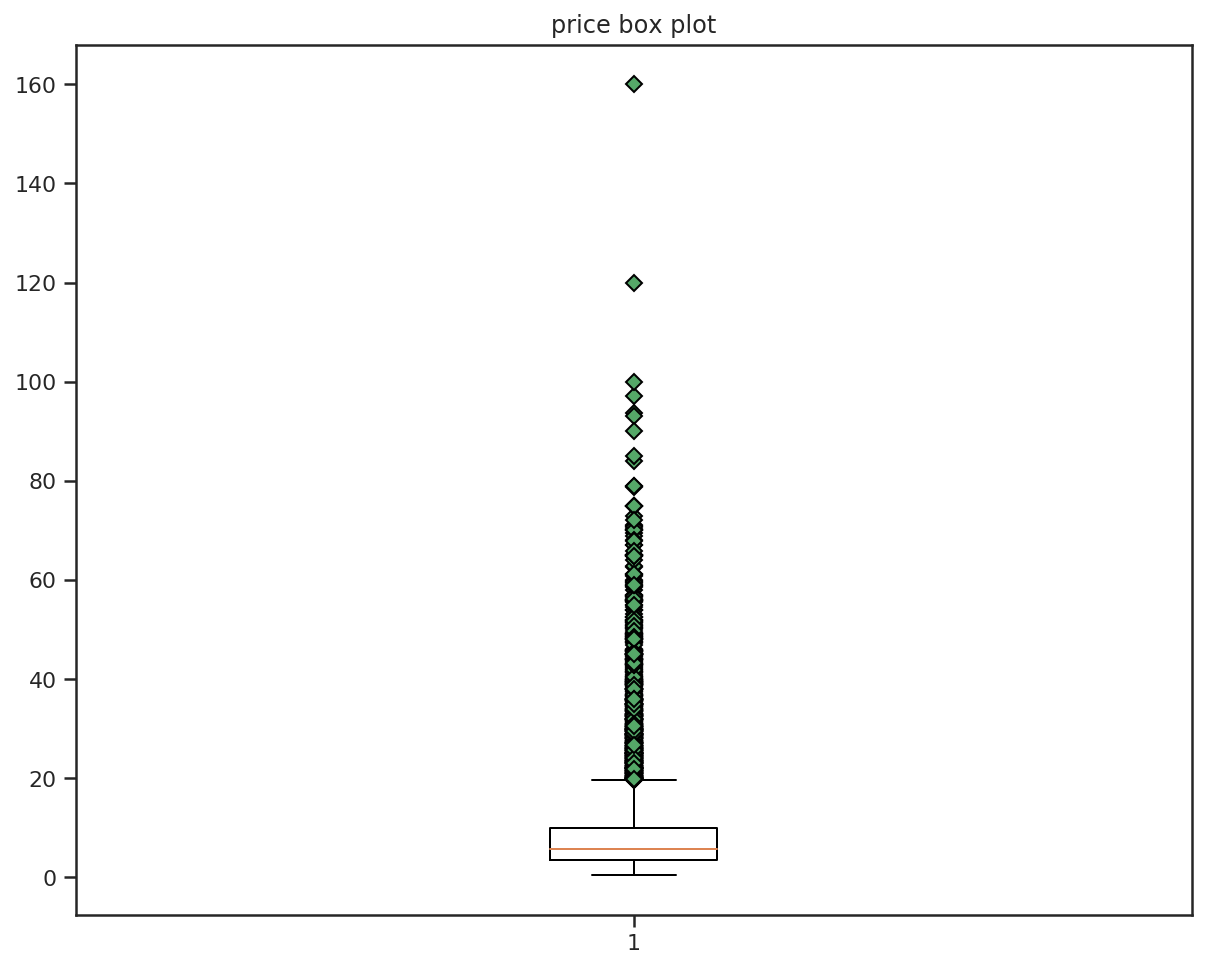

In [0]:
# price 처리 
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(train['price'], flierprops=green_diamond)
plt.title("price box plot")
plt.show()

outlier_price = train.loc[train['price'] >= 100,:]

# Land Rover Range Rover 3.0 Diesel LWB Vogue -> price = 160 행 삭제 
## price가 160에 해당하기에 차종의 스펙 브랜드 등에서 잘못된 표기라고 판단

train.drop(train.loc[train['price'] == 160.0, :].index, axis=0 , inplace=True)

### 범주형 변수의 전처리
* name(brand name / car name), location, fue_type, transmission, owner_type

In [0]:
# location 처리
# mubai/deli/col/chenai -> metro 1
# bangalroo/ hyd/ameda/pune -> metro 2
# zaipuru / cochi/ coinbatro -> metro 3 / emergiging

loc_list = train['location'].unique()
loc_list
loc_map = {'Mumbai':'metro 1','Delhi':'metro 1','Kolkata':'metro 1','Chennai':'metro 1',
           'Bangalore':'metro 2','Hyderabad':'metro 2','Ahmedabad':'metro 2','Pune':'metro 2',
           'Jaipur':'emerging','Kochi':'emerging','Coimbatore':'emerging'}
train['loc_type'] = train['location'].map(loc_map)
train

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

,name,location,year,km_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,brand_name,car_name,yn_new_price,loc_type
0,Maruti Wagon R LXI CNG,Mumbai,10,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon,0,metro 1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,5,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta,0,metro 2
2,Honda Jazz V,Chennai,9,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda,Jazz,1,metro 1
3,Maruti Ertiga VDI,Chennai,8,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga,0,metro 1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,7,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4,0,emerging
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,6,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88 Lakh,4.75,Maruti,Swift,1,metro 1
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,5,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,NaN,4.00,Hyundai,Xcent,0,emerging
6016,Mahindra Xylo D4 BSIV,Jaipur,8,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,NaN,2.90,Mahindra,Xylo,0,emerging
6017,Maruti Wagon R VXI,Kolkata,7,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,NaN,2.65,Maruti,Wagon,0,metro 1


Text(0.5, 1.0, 'Count of Unique Values in location')

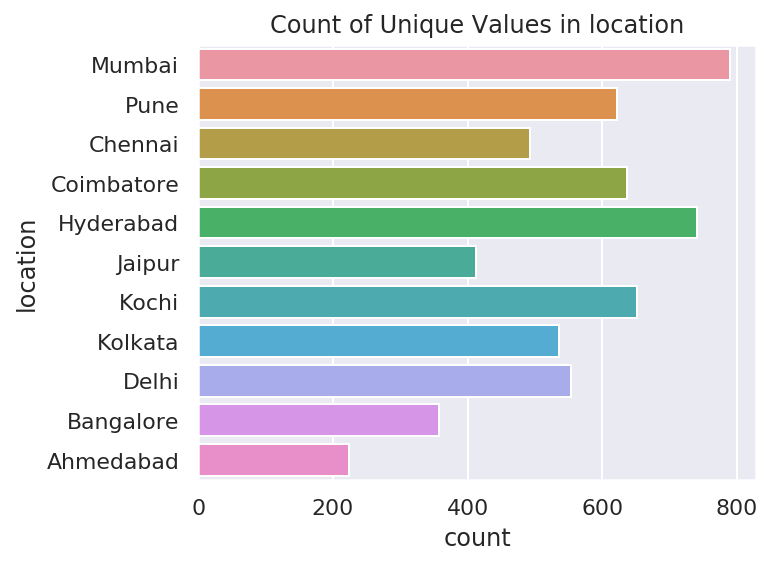

In [0]:
sns.set(rc={'figure.figsize':(5,4)})
sns.countplot(y='location',data=train)
plt.title('Count of Unique Values in location')

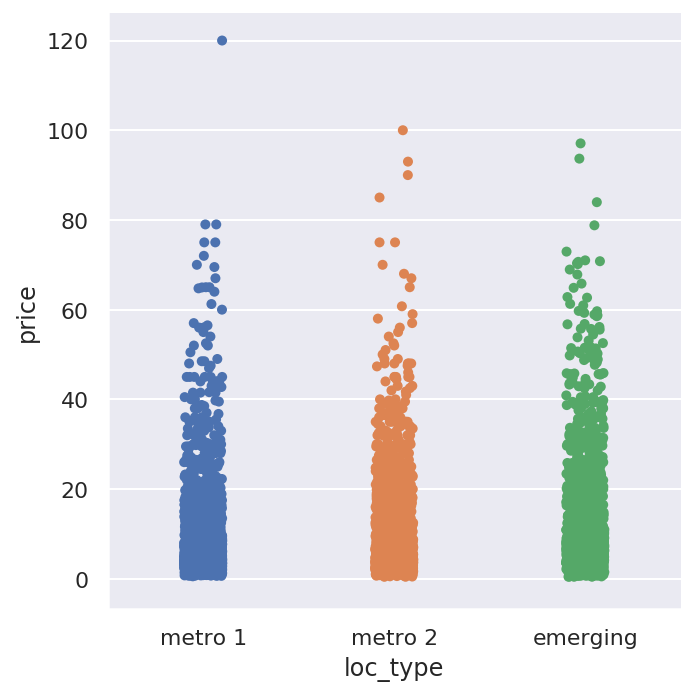

In [0]:
sns.catplot(x='loc_type',y='price',data=train)

#### fuel_type 범주화 (5->3)

In [0]:
# fuel_type 처리

train.loc[(train['fuel_type']=='CNG') | (train['fuel_type']=='LPG'),'fuel_type'] = 'Gas'
train.fuel_type.value_counts()

Diesel    3204
Petrol    2746
Gas         66
Name: fuel_type, dtype: int64

Text(0.5, 1.0, 'Count of Unique Values in Fuel Type')

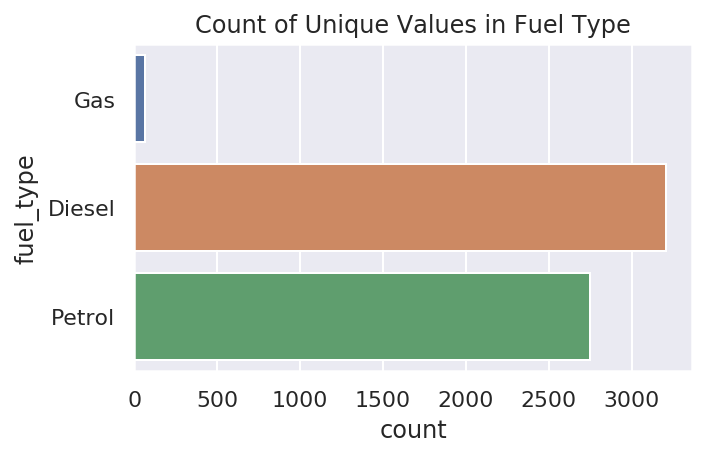

In [0]:
sns.set(rc={'figure.figsize':(5,3)})
sns.countplot(y='fuel_type',data=train)
plt.title('Count of Unique Values in Fuel Type')

#### owner_type 범주화

In [0]:
# owner_type 처리

owner_list = train['owner_type']

# third + Fourth&Above 로 묶기
train.loc[train['owner_type']=='Fourth & Above','owner_type'] = 'Third'
train['owner_type'].value_counts()

First     4926
Second     968
Third      122
Name: owner_type, dtype: int64

Text(0.5, 1.0, 'Count of Unique Values in Owner Type')

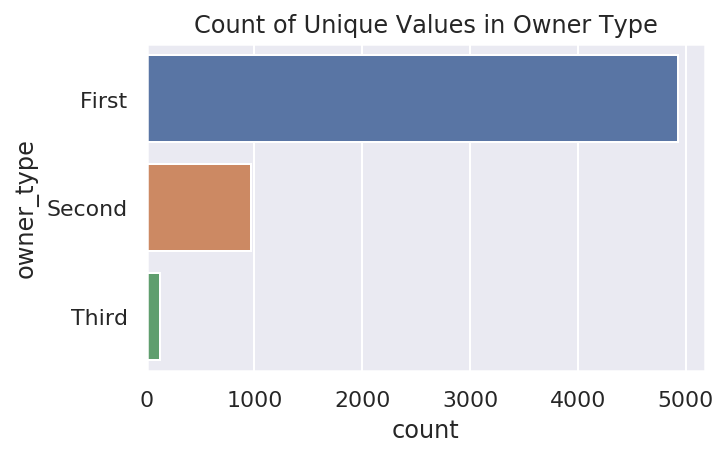

In [0]:
sns.set(rc={'figure.figsize':(5,3)})
sns.countplot(y='owner_type',data=train)
plt.title('Count of Unique Values in Owner Type')

#### brand_name 샘플이 적은 브랜드 통합하여 sparse brand 생성

In [0]:
# brand_name 처리 

# 전체 개수 및 비율 비교
df_brand_name = pd.DataFrame(train.brand_name.value_counts())
df_brand_name.rename(columns={'brand_name':'count'},inplace=True)
total = sum(df_brand_name['count'])
df_brand_name['ratio'] = df_brand_name['count'].apply(lambda x : (x /total ) *100)
# df_brand_name

# 1) 전체 개수 중 10개 이하인건 기타로 묶기 
sparse_brand_lst= df_brand_name.loc[df_brand_name['count']<10,:].index.values.tolist()
train.loc[train["brand_name"].isin(sparse_brand_lst),"brand_name"] = "sparse_brand"

df_brand_name.loc[df_brand_name['count']<10,:]

# 2) 전체 2% 이하인건 기타로 묶기 
df_brand_name.loc[df_brand_name['ratio']<1,:]


,count,ratio
Force One,3,0.049867
Isuzu,3,0.049867
Smart Fortwo,1,0.016622
Lamborghini,1,0.016622
Bentley,1,0.016622
Ambassador,1,0.016622


,count,ratio
Land Rover,59,0.980718
Jaguar,40,0.664894
Fiat,28,0.465426
Mitsubishi,27,0.448803
Mini,26,0.432181
Volvo,21,0.349069
Porsche,18,0.299202
Jeep,15,0.249335
Datsun,13,0.216090
Force One,3,0.049867


In [0]:
sparse_brand_lst

['Force One', 'Isuzu', 'Smart Fortwo', 'Lamborghini', 'Bentley', 'Ambassador']

### 전처리 변수 중간 결과물

In [0]:
train.columns

Index(['name', 'location', 'year', 'km_driven', 'fuel_type', 'transmission',
       'owner_type', 'mileage', 'engine', 'power', 'seats', 'new_price',
       'price', 'brand_name', 'car_name', 'yn_new_price', 'loc_type'],
      dtype='object')

In [0]:
x_df = train[['year', 'km_driven', 'fuel_type', 'transmission', 'owner_type','mileage', 'engine', 'power', 'seats', 'price', 'brand_name','yn_new_price', 'loc_type']].copy()

In [0]:
x = x_df.drop("price", axis=1) # 여러열 조작 -> axis =1 열 제거
y_labels = x_df["price"].copy()

In [0]:
y_log = np.log(y_labels) + 1

In [0]:
x.shape, y_log.shape

((6016, 12), (6016,))

### PCA (  Engine, Power, MIleage )

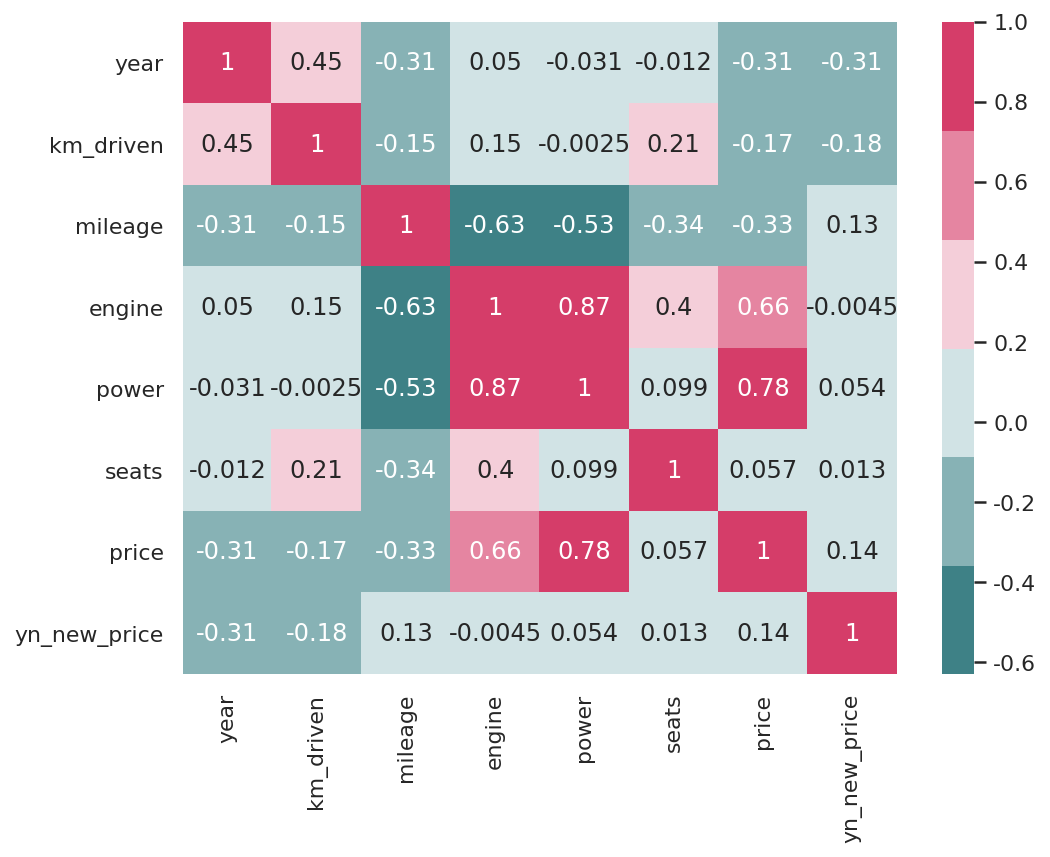

In [0]:
# Engine을 중심으로 Mileage와의 상관계수 절대값은 0.63, Power와의 상관계수 절대값은 0.87

sns.set(rc={'figure.figsize':(8,6)})
cmap = sns.diverging_palette(200, 0)
corr_heatmap = sns.heatmap(x_df.corr(),cmap=cmap, annot=True)
corr_heatmap

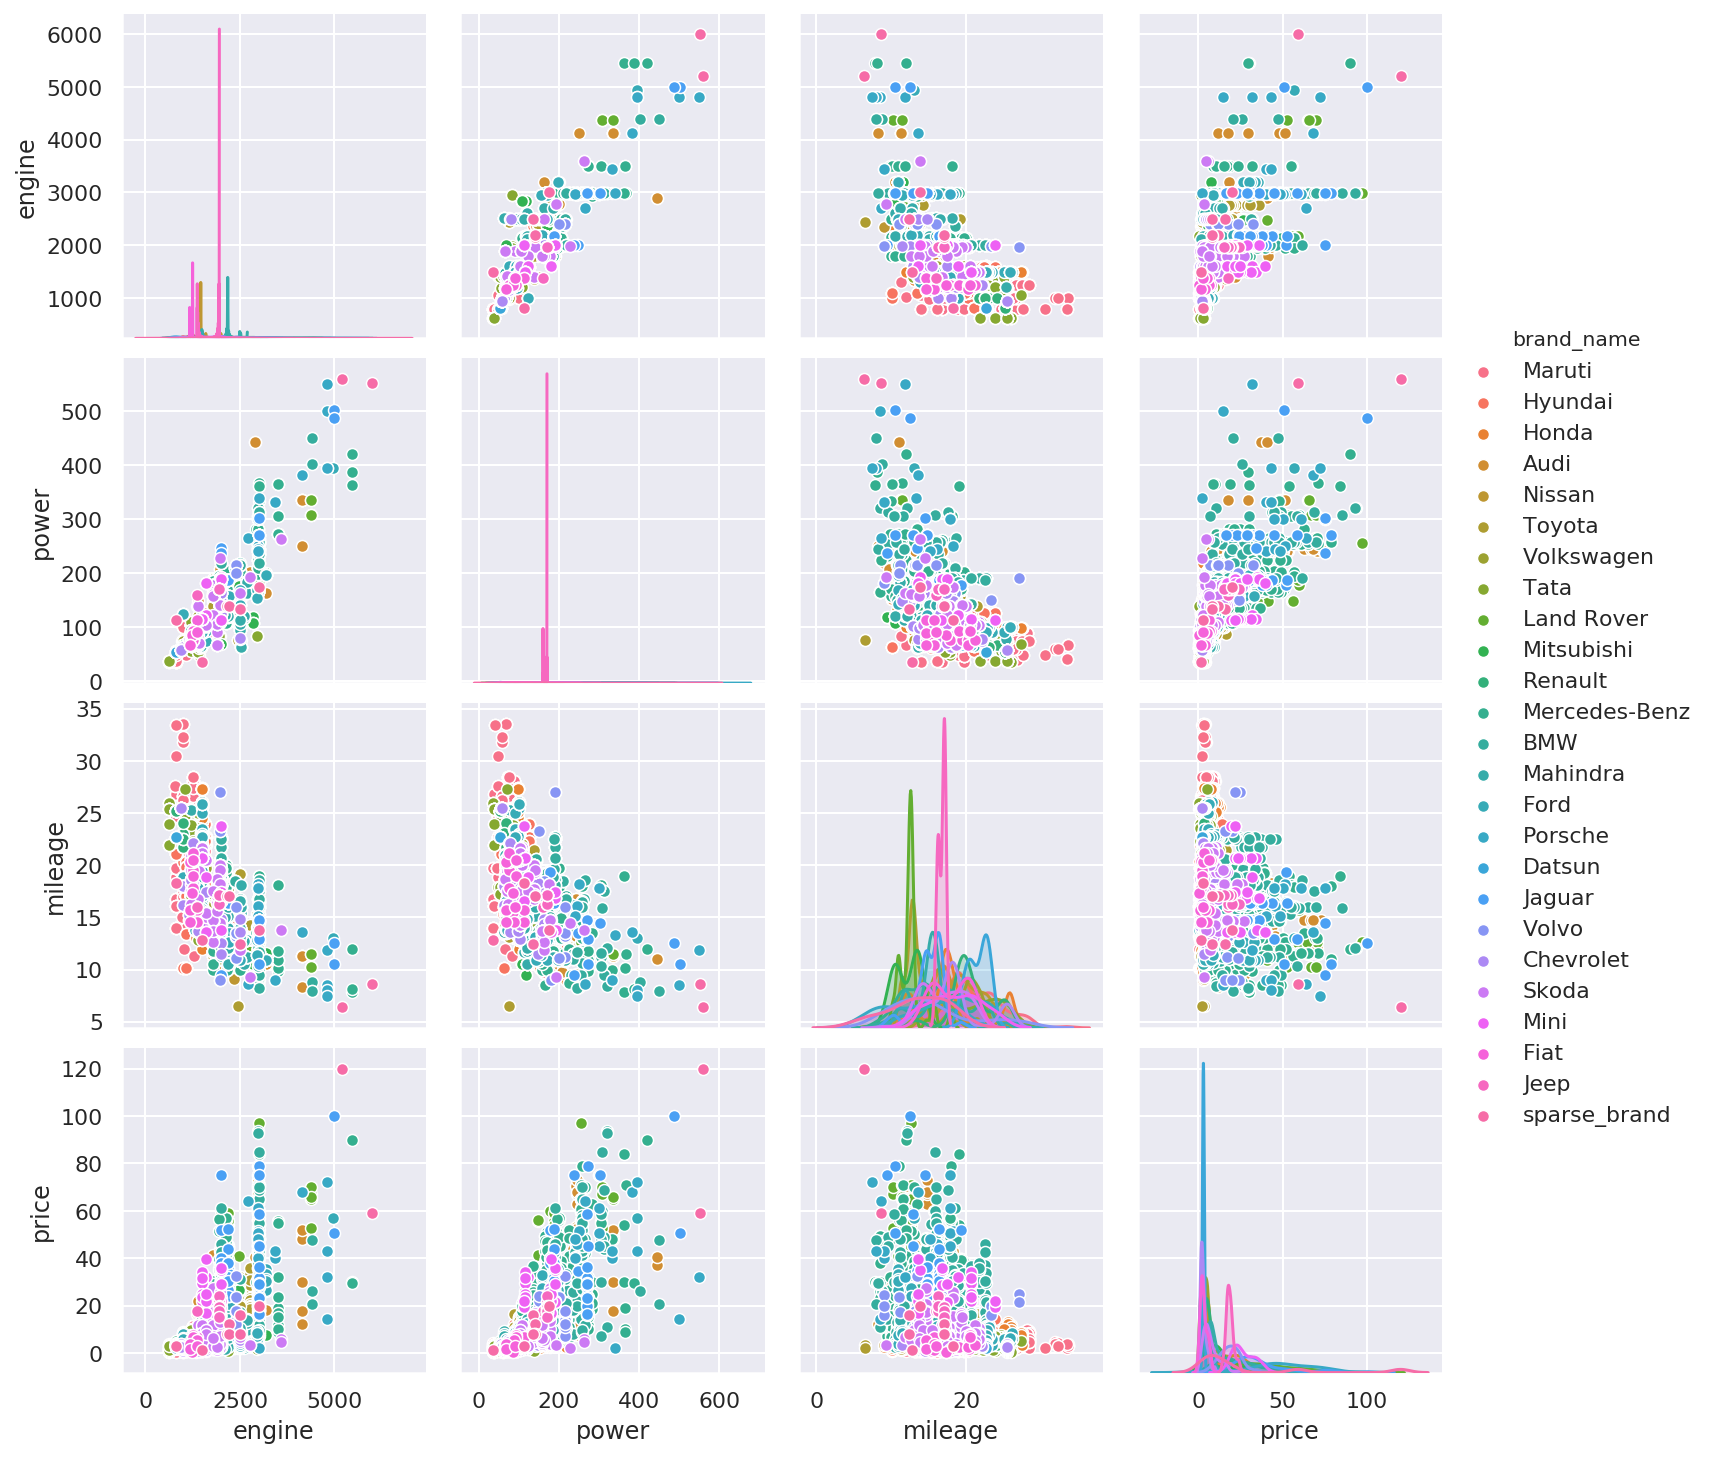

In [0]:
# engine과 power의 산포도는 일직선에 가까운 모양을 형성, 선형모델을 로그 필요한 변수들 존재

sns.pairplot(x_df, vars=['engine', 'power','mileage','price'], hue='brand_name')

In [0]:
from sklearn.decomposition import PCA

# 유보
pca = PCA(n_components=3)
train_for_pca = np.log(x_df[['mileage','engine', 'power']])
pca.fit(train_for_pca)
print('singular value :', pca.singular_values_)
print("PC1 정보량 : ",(pca.singular_values_[0]/sum(pca.singular_values_[0:2])).round(2))
print('singular vector :\n', pca.components_.T)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

singular value : [42.29445988 14.52653751  8.96766254]
PC1 정보량 :  0.74
singular vector :
 [[-0.30805876 -0.90439924  0.29523181]
 [ 0.5953427   0.0587948   0.80131781]
 [ 0.74206932 -0.42261707 -0.52031523]]


In [0]:
# 채택
pca = PCA(n_components=2)
train_for_pca = np.log(x_df[['engine', 'power']])
pca.fit(train_for_pca)
print('singular value :', pca.singular_values_)
print("PC1 정보량 : ",(pca.singular_values_[0]/sum(pca.singular_values_[0:2])).round(2))
print('singular vector :\n', pca.components_.T)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

singular value : [40.47203134  9.63871375]
PC1 정보량 :  0.81
singular vector :
 [[ 0.61976547  0.78478708]
 [ 0.78478708 -0.61976547]]


#  Pipeline1, LOG + PCA

Modeling 두번에 걸쳐 실시, 그 값 비교

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA

class Custom_Logging(BaseEstimator,TransformerMixin) :
  def __init__(self,centering=False) :
    self.centering = centering
  def fit(self,X,y=None):
    return self 
  def transform(self,X):
    logging_tmp = np.log(X)
    if self.centering:
      centering_logging_tmp = logging_tmp - logging_tmp.mean(axis=0)
      return centering_logging_tmp
    else : 
      return logging_tmp

In [0]:
class Custom_pass(BaseEstimator,TransformerMixin) :
  def __init__(self) :
    pass
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    return X

In [0]:
pca_num_pipeline = Pipeline([
                             ('Logging', Custom_Logging(centering=True)),
                             ('PCA', PCA(n_components=1)),
])

In [0]:
num_pipeline = Pipeline([
                         ('Logging', Custom_Logging(centering=False)),
])

In [0]:
raw_num_pipeline = Pipeline([
    ('raw_data_pass', Custom_pass())
])

In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

pca_num_attribs = ['engine', 'power']
else_num_attribs = ['mileage','km_driven']
raw_num_attribs = ["year"]
cat_attribs = ['fuel_type',"transmission","owner_type",'seats','brand_name','yn_new_price','loc_type']

full_pipeline = ColumnTransformer([
                                   ("pca_num", pca_num_pipeline, pca_num_attribs), # 로그 -> centering -> PCA 
                                   ("else_num", num_pipeline, else_num_attribs), # 로그만
                                   ("orgin_num", raw_num_pipeline, raw_num_attribs), # 그대로
                                   ("cat", OneHotEncoder(sparse=False), cat_attribs),
])

x_prepared = full_pipeline.fit_transform(x)

In [0]:
x_prepared.shape

(6016, 50)

In [0]:
x_prepared[:1,]

array([[-0.71013154,  3.28091122, 11.1844214 , 10.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ]])

In [0]:
y_log

0       1.559616
1       3.525729
2       2.504077
3       2.791759
4       3.875822
          ...   
6014    2.558145
6015    2.386294
6016    2.064711
6017    1.974560
6018    1.916291
Name: price, Length: 6016, dtype: float64


## 3. Variable Selection

In [0]:
cat_one_hot_attribs = full_pipeline.named_transformers_["cat"].get_feature_names(cat_attribs).tolist()
attributes = ["PC1"] + else_num_attribs + raw_num_attribs + cat_one_hot_attribs
attributes

x_df = pd.DataFrame(x_prepared, columns = attributes)

['PC1',
 'mileage',
 'km_driven',
 'year',
 'fuel_type_Diesel',
 'fuel_type_Gas',
 'fuel_type_Petrol',
 'transmission_Automatic',
 'transmission_Manual',
 'owner_type_First',
 'owner_type_Second',
 'owner_type_Third',
 'seats_2.0',
 'seats_4.0',
 'seats_5.0',
 'seats_6.0',
 'seats_7.0',
 'seats_8.0',
 'seats_9.0',
 'seats_10.0',
 'brand_name_Audi',
 'brand_name_BMW',
 'brand_name_Chevrolet',
 'brand_name_Datsun',
 'brand_name_Fiat',
 'brand_name_Ford',
 'brand_name_Honda',
 'brand_name_Hyundai',
 'brand_name_Jaguar',
 'brand_name_Jeep',
 'brand_name_Land Rover',
 'brand_name_Mahindra',
 'brand_name_Maruti',
 'brand_name_Mercedes-Benz',
 'brand_name_Mini',
 'brand_name_Mitsubishi',
 'brand_name_Nissan',
 'brand_name_Porsche',
 'brand_name_Renault',
 'brand_name_Skoda',
 'brand_name_Tata',
 'brand_name_Toyota',
 'brand_name_Volkswagen',
 'brand_name_Volvo',
 'brand_name_sparse_brand',
 'yn_new_price_0',
 'yn_new_price_1',
 'loc_type_emerging',
 'loc_type_metro 1',
 'loc_type_metro 2']

### Importance Test

RF (Variable Importance)

In [0]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [0]:
rf = RandomForestRegressor(random_state=42)
rf.fit(x_prepared, y_log)
rf_importances = rf.feature_importances_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [0]:
rf_indices = np.argsort(rf_importances)[::-1][:20]

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Feature importances')

<BarContainer object of 20 artists>

([<matplotlib.axis.XTick at 0x7fb3352daef0>,
 <a list of 20 Text xticklabel objects>)

(-1, 20)

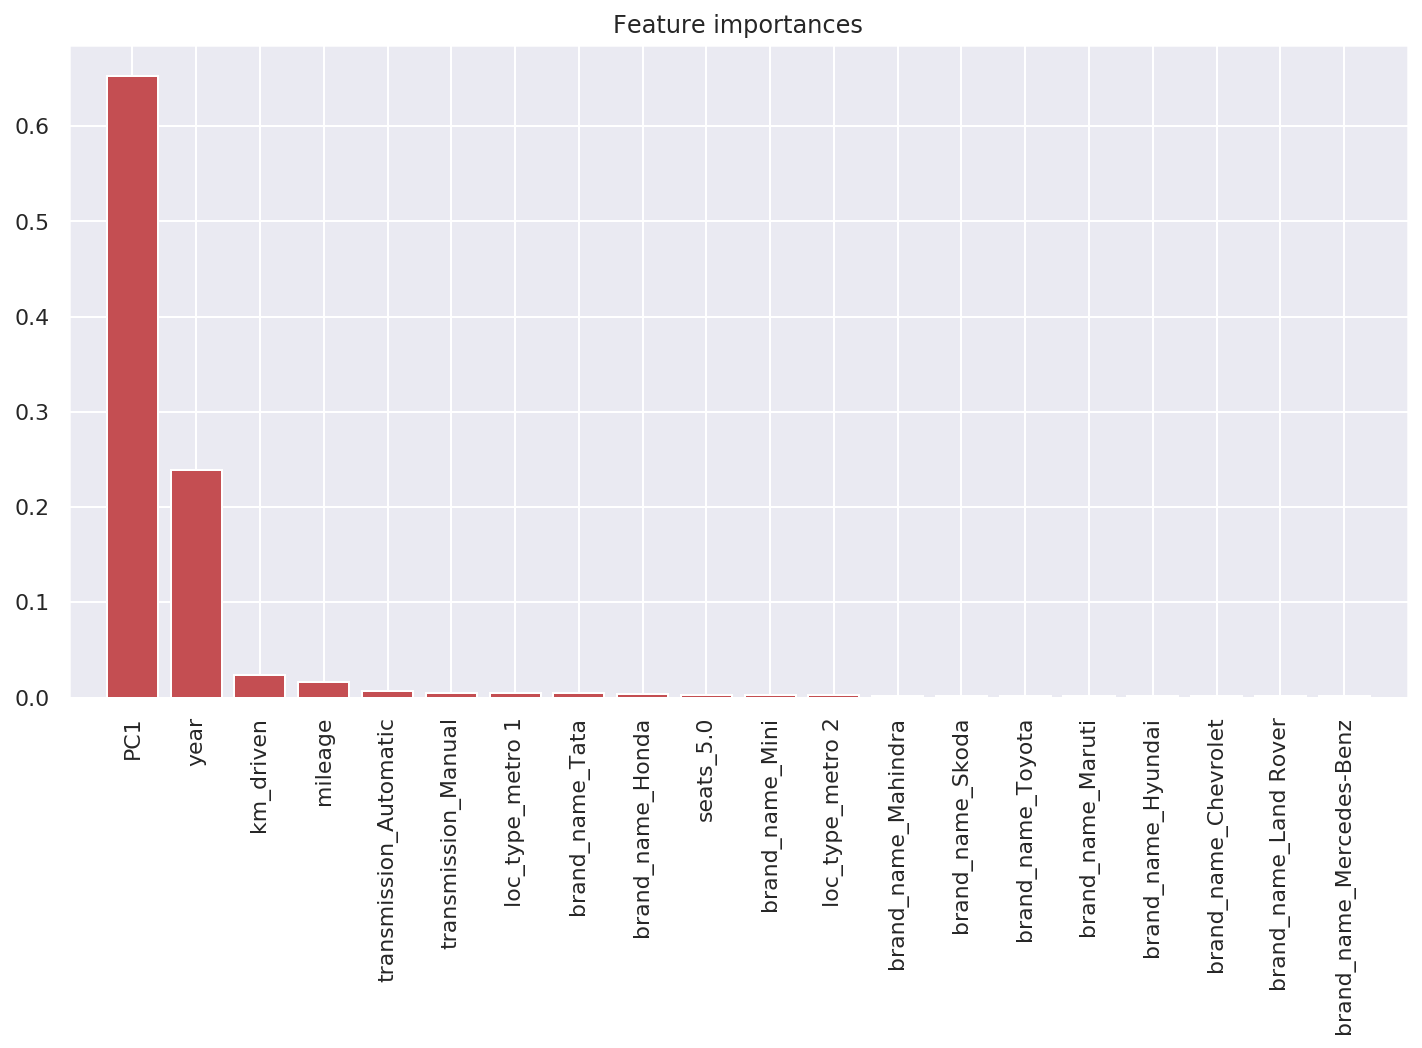

In [0]:
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(len(rf_indices)), rf_importances[rf_indices], color="r", align="center")
plt.xticks(range(len(rf_indices)), np.array(attributes)[rf_indices], rotation='vertical')
plt.xlim([-1, len(rf_indices)])
plt.show()

XGBoosting

In [0]:
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror',random_state=42)
xgb_reg.fit(x_prepared,y_log)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [0]:
# 중요도 내림차순
xgb_importances = xgb_reg.feature_importances_
sorted( zip(xgb_importances, attributes) , reverse = True)

[(0.28039056, 'PC1'),
 (0.19035049, 'transmission_Automatic'),
 (0.17104033, 'year'),
 (0.04316658, 'fuel_type_Diesel'),
 (0.03826194, 'brand_name_Honda'),
 (0.02677019, 'brand_name_Tata'),
 (0.02390211, 'seats_4.0'),
 (0.019561684, 'brand_name_Land Rover'),
 (0.01941009, 'loc_type_metro 1'),
 (0.01902981, 'brand_name_Chevrolet'),
 (0.01712311, 'brand_name_Mercedes-Benz'),
 (0.015232505, 'km_driven'),
 (0.0150093, 'brand_name_Mini'),
 (0.014384926, 'brand_name_Toyota'),
 (0.010620721, 'brand_name_Porsche'),
 (0.009994516, 'brand_name_Mahindra'),
 (0.007601734, 'owner_type_First'),
 (0.0071766046, 'brand_name_Audi'),
 (0.00717552, 'fuel_type_Petrol'),
 (0.0063059903, 'brand_name_Maruti'),
 (0.0055952766, 'seats_5.0'),
 (0.005178999, 'seats_10.0'),
 (0.0051418906, 'brand_name_Ford'),
 (0.0049605584, 'loc_type_metro 2'),
 (0.0047289343, 'brand_name_BMW'),
 (0.004462643, 'mileage'),
 (0.004219726, 'owner_type_Third'),
 (0.0039994377, 'brand_name_Skoda'),
 (0.003630894, 'seats_2.0'),
 (0.00

In [0]:
xgb_indices = np.argsort(xgb_importances)[::-1][:20]

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Feature importances')

<BarContainer object of 20 artists>

([<matplotlib.axis.XTick at 0x7fb3352a5a20>,
 <a list of 20 Text xticklabel objects>)

(-1, 20)

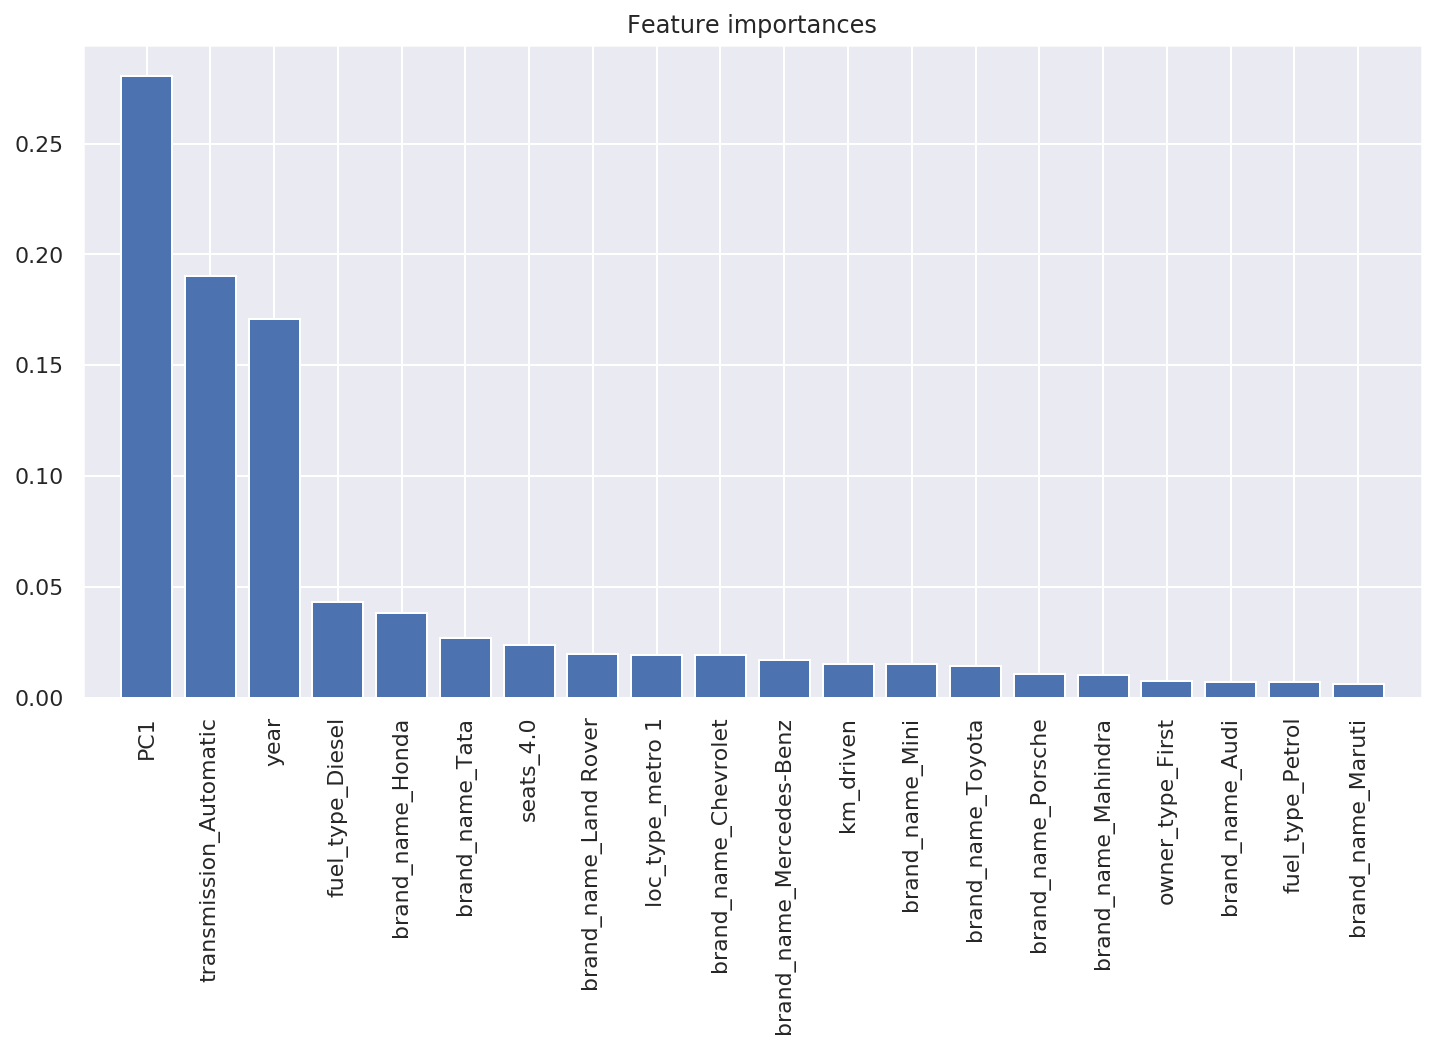

In [0]:
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(len(xgb_indices)), xgb_importances[xgb_indices], color="b", align="center")
plt.xticks(range(len(xgb_indices)), np.array(attributes)[xgb_indices], rotation='vertical')
plt.xlim([-1, len(xgb_indices)])
plt.show()

In [0]:
import_df = pd.DataFrame({'xgb':xgb_importances,
                          'rf':rf_importances},
              index=attributes) 

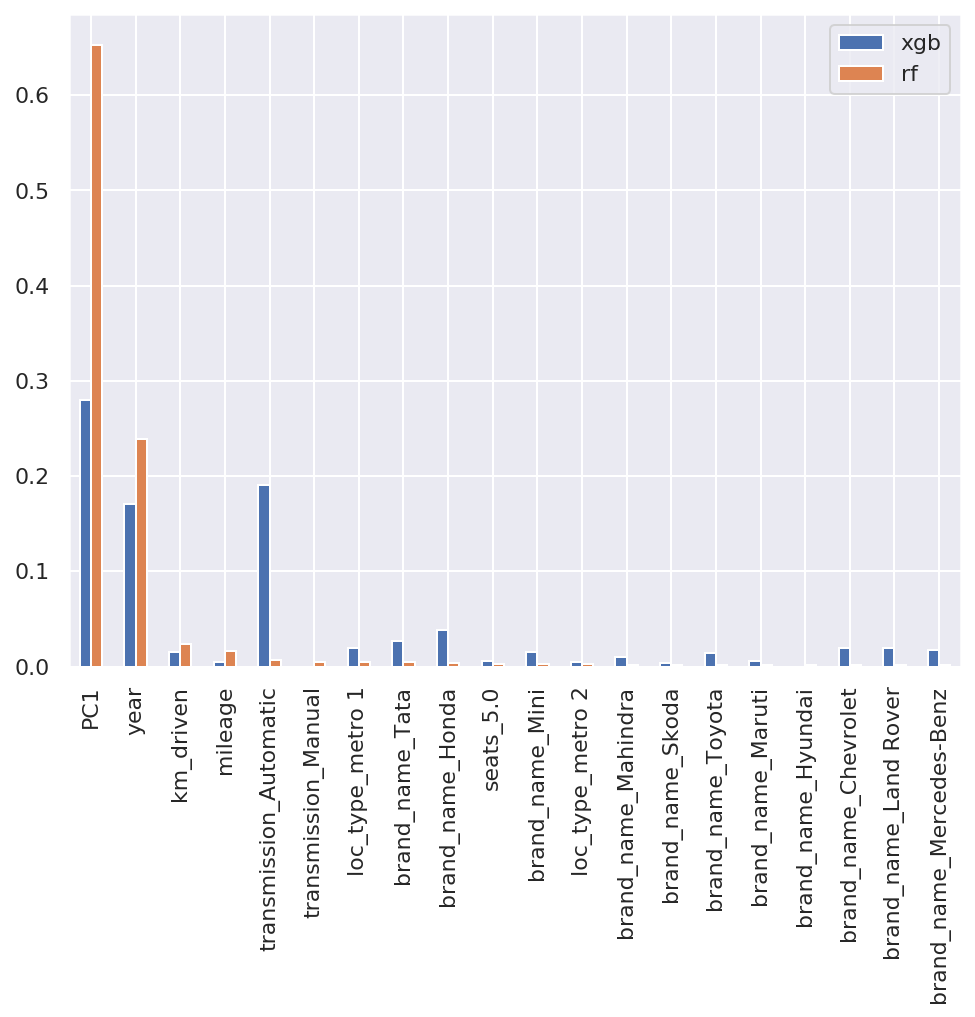

In [0]:
import_df.sort_values(by=['rf'],ascending=False)[:20].plot(kind="bar")

### Variable Selection by RFECV

#### RMSE를 사용하는 대신 비율 개념으로 오차를 측정하는 함수 생성

In [0]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error,make_scorer

def mean_absolute_percentage_error_exp(y_true, y_pred): 
    y_pred[y_pred < 0] = 0
    y_true, y_pred = np.exp(np.array(y_true)-1), np.exp(np.array(y_pred)-1)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
scorer = make_scorer(mean_absolute_percentage_error_exp, greater_is_better=False)

In [0]:
rf = RandomForestRegressor(random_state=42)

selector = RFECV(rf, step = 1, cv = 3, scoring= scorer) # 스텝당 한 개를 제거
selector.fit(x_df, y_log)

RFECV(cv=3,
      estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=None,
                                      oob_score=False, random_state=42,
                                      verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None,
      scoring=make_scorer(mean_absolute_percentage_error_exp, greater_is_better=False),
      step=1, verbose=0)

Text(0.5, 0, 'Number of Features')

Text(0, 0.5, 'mean_absolute_percentage_error')

Text(0.5, 1.0, 'Feature Selection Scores')

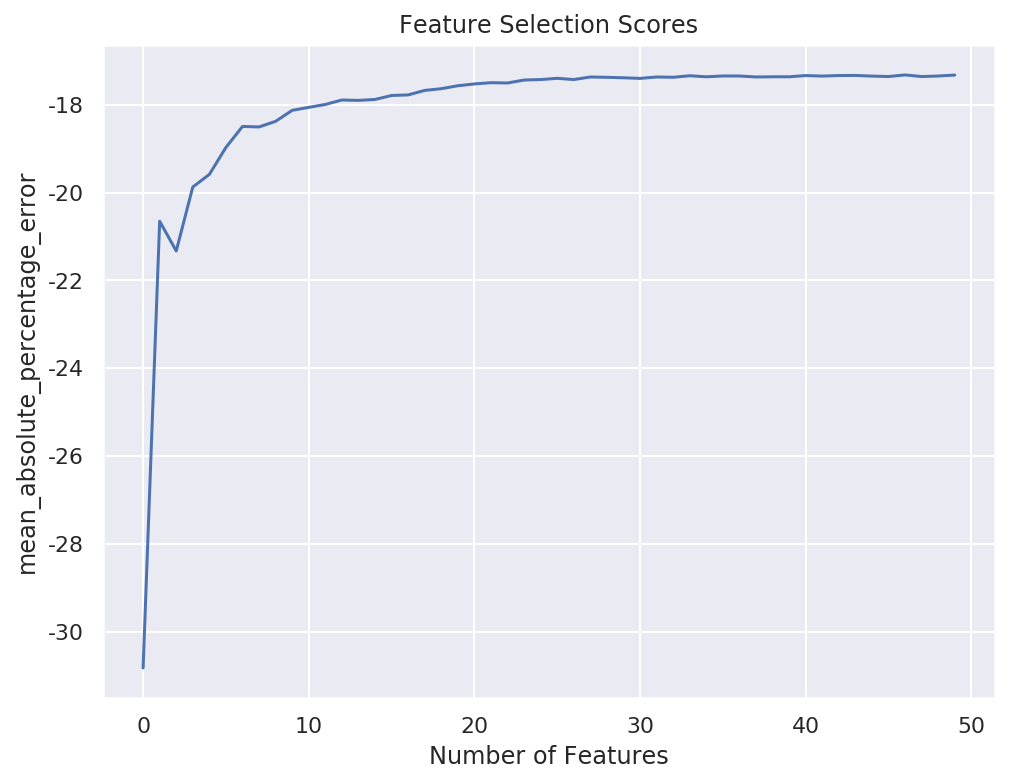

In [0]:
plt.plot(selector.grid_scores_);
plt.xlabel('Number of Features'); plt.ylabel('mean_absolute_percentage_error'); plt.title('Feature Selection Scores')

In [0]:
selector.n_features_

47

In [0]:
att_rankings = pd.DataFrame({'feature': list(x_df.columns), 'rank': list(selector.ranking_)}).sort_values('rank')
att_rankings

,feature,rank
0,PC1,1
26,brand_name_Honda,1
27,brand_name_Hyundai,1
28,brand_name_Jaguar,1
30,brand_name_Land Rover,1
31,brand_name_Mahindra,1
32,brand_name_Maruti,1
33,brand_name_Mercedes-Benz,1
34,brand_name_Mini,1
35,brand_name_Mitsubishi,1


In [0]:
x_selected = selector.transform(x_prepared)
selected_features = x_df.columns[np.where(selector.ranking_==1)]
x_selected_df = pd.DataFrame(x_selected, columns = selected_features)

In [0]:
x_selected_df.shape

(6016, 47)

## 4. Modeling

### Cross Validation

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,SGDRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [0]:
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    cv_scores = cross_val_score(model, train, train_labels, cv = 5, scoring=scorer)
    # cv_scores = cross_val_score(model, train, train_labels, cv = 5, scoring="neg_mean_squared_error")
    print(f'5 Fold CV Score: {round(cv_scores.mean(), 2)}, std: {round(cv_scores.std(), 2)}')

    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [0]:
model_results = cv_model(x_df, y_log, LinearRegression(), 'LR_OLS', model_results)

5 Fold CV Score: -19.04, std: 1.0


In [0]:
model_results = cv_model(x_selected_df, y_log, Lasso(alpha=0.01), 'LR_Lasso_0.01', model_results)

5 Fold CV Score: -24.2, std: 0.6


In [0]:
model_results = cv_model(x_selected_df, y_log, Lasso(alpha=0.1), 'LR_Lasso_0.1', model_results)

5 Fold CV Score: -30.73, std: 0.6


In [0]:
model_results = cv_model(x_selected_df, y_log, SGDRegressor(max_iter=10000, tol=1e-5, penalty=None, random_state=42),
                         'LR_SGD', model_results)

5 Fold CV Score: -19.6, std: 0.53


In [0]:
param_grid = [{"epsilon" : [0.5,1,1.5]}]
model = LinearSVR(random_state=42)
grid_search = GridSearchCV(model,param_grid,cv=3,scoring=scorer)

model_results = cv_model(x_selected_df, y_log, grid_search,'Linear_SVR', model_results)

5 Fold CV Score: -19.78, std: 0.9


In [0]:
from sklearn.svm import SVR

param_grid = [{"C" : [10,0.1]}]
model = SVR(kernel="poly", gamma="auto", degree=2)
grid_search = GridSearchCV(model,param_grid,cv=3,scoring=scorer)

model_results = cv_model(x_selected_df, y_log, grid_search,'Kernal_poly_SVR', model_results)

5 Fold CV Score: -17.81, std: 1.53


In [0]:
model_results = cv_model(x_selected_df, y_log, RandomForestRegressor(random_state=42, n_jobs = -1), 'RF', model_results)

5 Fold CV Score: -17.06, std: 0.74


In [0]:
param_grid = [ 
              {"max_depth" : [3,8,10], "eta":[0.02,0.05,0.1],
              'subsample': [0.8,1], 'colsample_bytree': [0.7]}
]

xgb_reg = xgb.XGBRegressor(random_state=42,objective ='reg:squarederror')
grid_search = GridSearchCV(xgb_reg,param_grid,cv=3,
                           scoring=scorer)

grid_search.fit(x_selected_df, y_log)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=42, reg_alpha...1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid=[{'colsample_bytree': [0.7], 'eta': [0.02, 0.05, 0.1],
                          'max_depth': [3, 8, 10], 'subsam

In [0]:
grid_search.best_params_ # 사용자 지정 중 최적 파라미터

{'colsample_bytree': 0.7, 'eta': 0.02, 'max_depth': 10, 'subsample': 1}

In [0]:
grid_search.best_estimator_ # 전체 중 최적 파라미터

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eta=0.02, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [0]:
model_results = cv_model(x_selected_df, y_log,xgb.XGBRegressor(colsample_bytree=  0.7, eta= 0.02, max_depth= 10, 
                                                       subsample= 1, random_state=42, n_jobs = -1), 'XGB', model_results)

[08:42:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
5 Fold CV Score: -15.24, std: 0.65


In [0]:
model_results

,model,cv_mean,cv_std
0,LR_Lasso_0.1,-30.730086,0.597895
1,LR_Lasso_0.01,-24.195906,0.603783
2,Linear_SVR,-19.784916,0.897179
3,LR_SGD,-19.598515,0.534700
4,LR_OLS,-19.039122,1.004626
5,Kernal_poly_SVR,-17.808068,1.532952
6,RF,-17.058395,0.741329
7,XGB,-15.235426,0.646619


### Compare Model

Text(0.5, 1.0, 'Model Compare Results')

Text(0, 0.5, 'MAPE (with error bar)')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

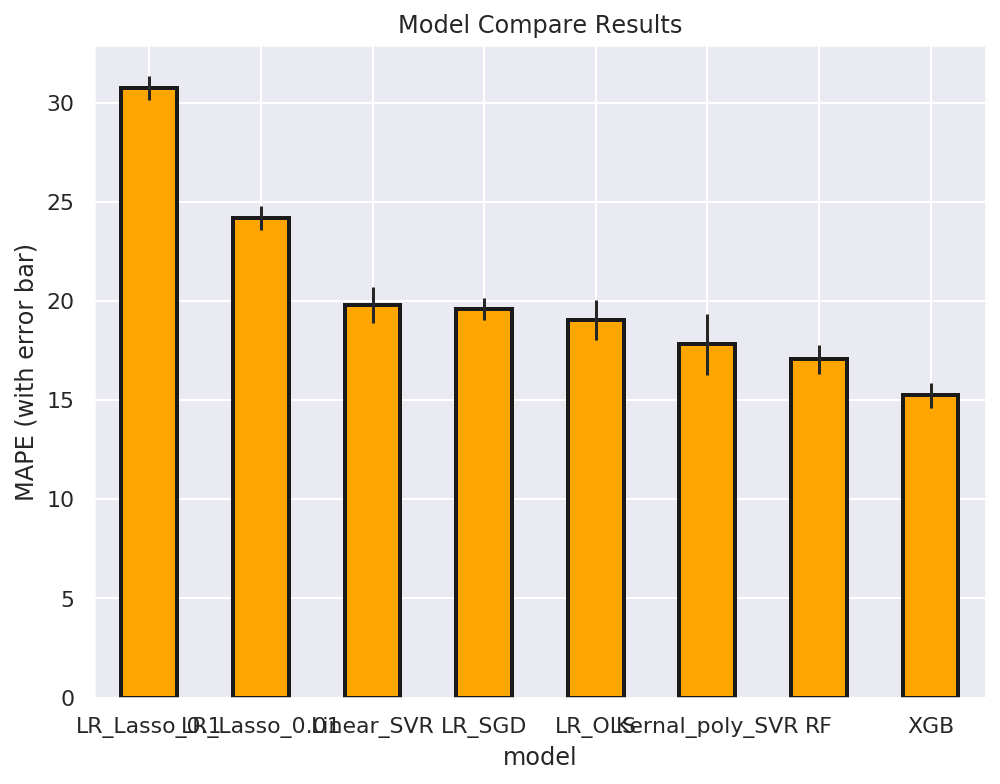

In [0]:
model_results.set_index('model', inplace = True)
model_results=model_results.sort_values("cv_mean")
(model_results['cv_mean']*(-1)).plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                 edgecolor = 'k', linewidth = 2)
plt.title('Model Compare Results');
plt.ylabel('MAPE (with error bar)');
plt.xticks(rotation='horizontal');
model_results.reset_index(inplace = True)

XGB is best

## 5. Inference

In [0]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

Xt, Xv, yt, yv = train_test_split(x_selected_df,y_log, test_size=0.2, random_state=42)
model = xgb.XGBRegressor(colsample_bytree=  0.7, eta= 0.02, max_depth= 10, subsample= 1, random_state=42, n_jobs = -1)
model.fit(Xt,yt)

[08:43:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eta=0.02, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
model.score(Xv,yv)

0.9469973101540808

In [0]:
real_val = round(np.exp(yv-1),2).to_numpy()
predict_val = np.round(np.exp(model.predict(Xv)-1),2)

print(f"real:{real_val[:5].tolist()}, \npredict:{predict_val[:5]}")

real:[1.25, 6.5, 3.9, 4.99, 3.11], 
predict:[1.29 5.51 3.73 5.27 4.04]


###  SHAP : 오분류 데이터 검증 : 왜 이차 들의 가격을 예측하지 못했을까?

In [0]:
miss_idx = np.argsort((real_val - predict_val) / real_val)[::-1][:10].tolist()
pd.DataFrame({"real":real_val[miss_idx], "pred":predict_val[miss_idx]},index=miss_idx)

,real,pred
458,83.96,25.27
220,40.00,12.04
148,75.00,29.92
1108,1.52,0.65
1035,14.45,6.74
1041,1.60,0.79
1158,9.80,4.87
866,26.00,13.55
1079,22.00,11.55
324,9.50,5.26


In [0]:
model.predict(Xv)[miss_idx]

array([4.22946   , 3.4879026 , 4.398421  , 0.5656917 , 2.9083962 ,
       0.75890005, 2.5829954 , 3.606276  , 3.4465504 , 2.661052  ],
      dtype=float32)

In [0]:
## 어떤변수가 더 필요할까? 이러한 값에는 어떠한 변수들이 어떤 영향을 줬을까? 

In [0]:
!pip install shap
import shap

     |████████████████████████████████| 266kB 42.1MB/s 
  Created wheel for shap: filename=shap-0.34.0-cp36-cp36m-linux_x86_64.whl size=383193 sha256=4ebf8886836fa50fbbcb50cc040988a4468289484e38c81d7168bad84dafc37c
  Stored in directory: /root/.cache/pip/wheels/28/7e/28/57bc9fcb77579b0df6561298648249370648c0b91dfe42c8ec
Successfully built shap


In [0]:
# use Kernel SHAP to explain test set predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_selected_df)

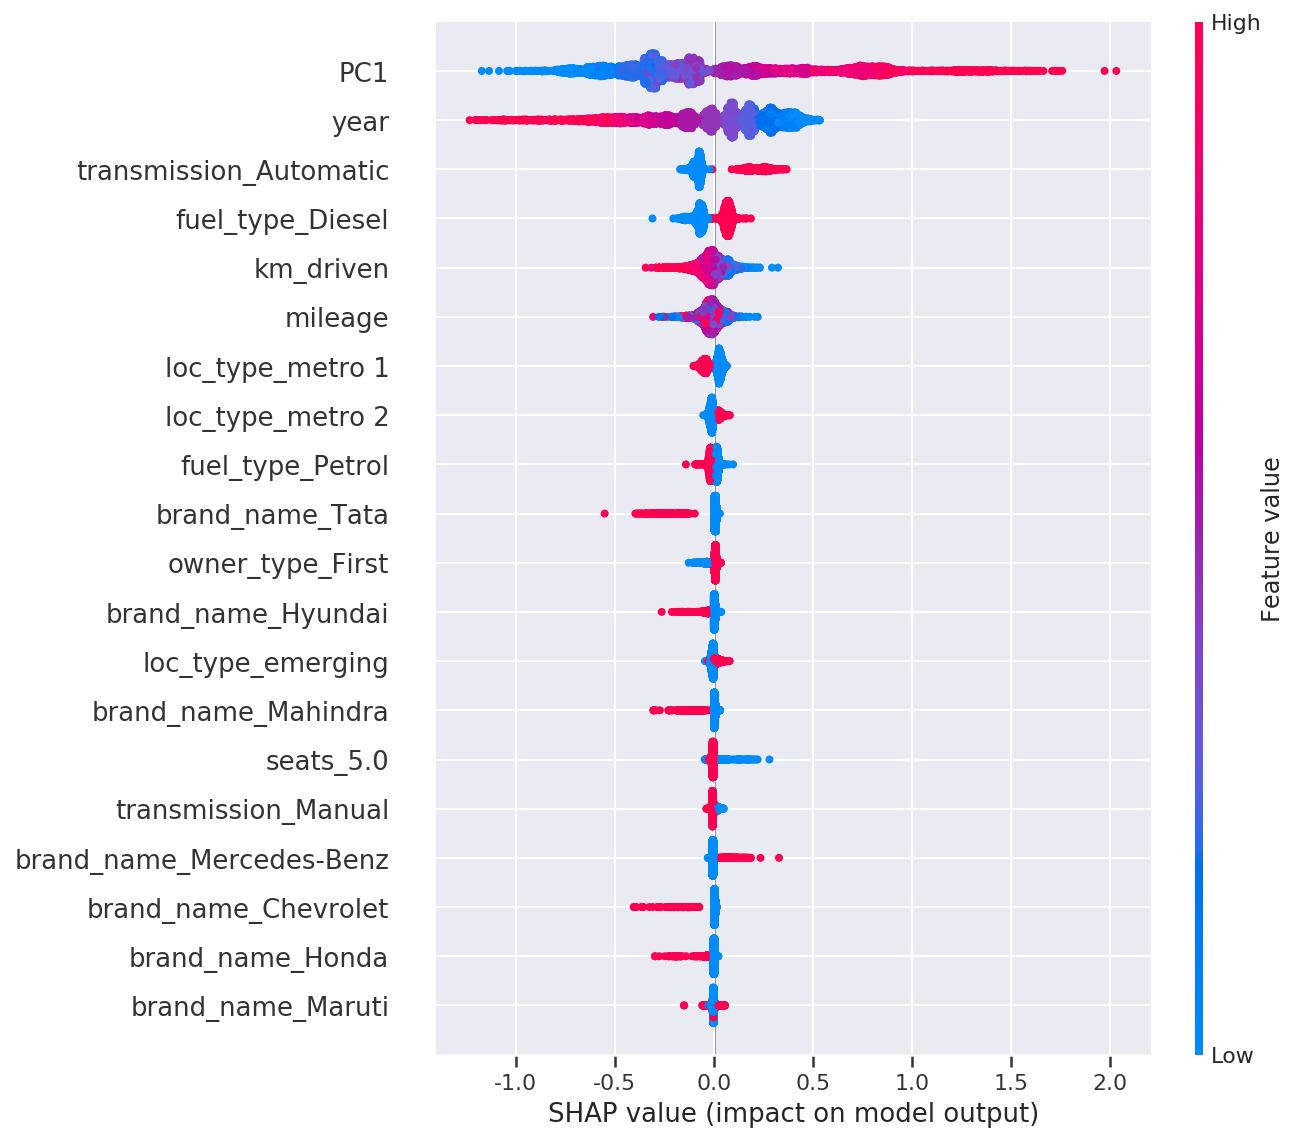

In [0]:
# 변수중요도 그림
shap.summary_plot(shap_values, x_selected_df)

In [0]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], x_selected_df.iloc[0,:])

In [0]:
shap.initjs()
shap.force_plot(explainer.expected_value,
                shap_values[Xv.iloc[[miss_idx[0]],].index.values,:],
                x_selected_df.iloc[Xv.iloc[[miss_idx[0]],].index.values,:])

In [0]:
import numpy as np
np.exp
np.log(83.96)+1

<ufunc 'exp'>

5.430340494952432

In [0]:
# np.argsort(predict_val)[::-1][:10].tolist()

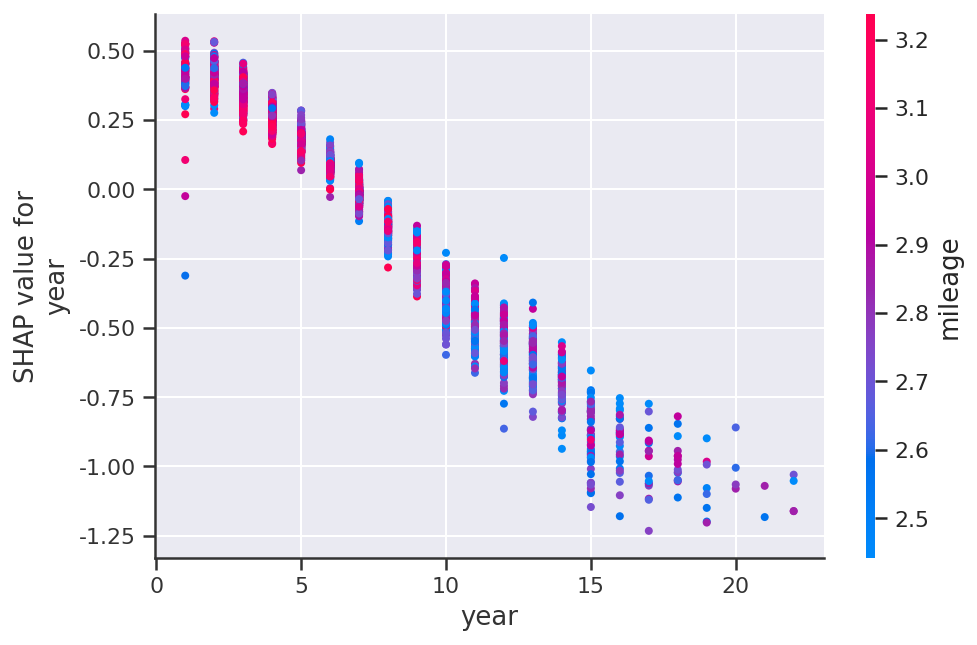

In [0]:
shap.dependence_plot("year", shap_values, x_selected_df, 
                     interaction_index="mileage")

In [0]:
train.iloc[Xv.iloc[[miss_idx[0]],].index.values,]

,name,location,year,km_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,brand_name,car_name,yn_new_price,loc_type
2095,Mercedes-Benz SLC 43 AMG,Coimbatore,1,2526,Petrol,Automatic,First,19.0,2996.0,362.07,2.0,1.06 Cr,83.96,Mercedes-Benz,SLC,1,emerging


# Pipeline2, 그대로

In [0]:
raw_num_pipeline = Pipeline([
    ('raw_data_pass', Custom_pass())
])

In [0]:
raw_num_attribs = ['engine', 'power','mileage','km_driven',"year"]
cat_attribs = ['fuel_type',"transmission","owner_type",'seats','brand_name','yn_new_price','loc_type']

full_pipeline = ColumnTransformer([
                                   ("orgin_num", raw_num_pipeline, raw_num_attribs), # 그대로
                                   ("cat", OneHotEncoder(sparse=False), cat_attribs),
])

x_prepared = full_pipeline.fit_transform(x)

In [0]:
x_prepared.shape

(6016, 51)

In [0]:
x_prepared[:1,]

array([[9.980e+02, 5.816e+01, 2.660e+01, 7.200e+04, 1.000e+01, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00]])

In [0]:
y_labels

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: price, Length: 6016, dtype: float64


## 3. Variable Selection 
- by RFECV

In [0]:
cat_one_hot_attribs = full_pipeline.named_transformers_["cat"].get_feature_names(cat_attribs).tolist()
attributes = raw_num_attribs + cat_one_hot_attribs
attributes

x_df = pd.DataFrame(x_prepared, columns = attributes)

['engine',
 'power',
 'mileage',
 'km_driven',
 'year',
 'fuel_type_Diesel',
 'fuel_type_Gas',
 'fuel_type_Petrol',
 'transmission_Automatic',
 'transmission_Manual',
 'owner_type_First',
 'owner_type_Second',
 'owner_type_Third',
 'seats_2.0',
 'seats_4.0',
 'seats_5.0',
 'seats_6.0',
 'seats_7.0',
 'seats_8.0',
 'seats_9.0',
 'seats_10.0',
 'brand_name_Audi',
 'brand_name_BMW',
 'brand_name_Chevrolet',
 'brand_name_Datsun',
 'brand_name_Fiat',
 'brand_name_Ford',
 'brand_name_Honda',
 'brand_name_Hyundai',
 'brand_name_Jaguar',
 'brand_name_Jeep',
 'brand_name_Land Rover',
 'brand_name_Mahindra',
 'brand_name_Maruti',
 'brand_name_Mercedes-Benz',
 'brand_name_Mini',
 'brand_name_Mitsubishi',
 'brand_name_Nissan',
 'brand_name_Porsche',
 'brand_name_Renault',
 'brand_name_Skoda',
 'brand_name_Tata',
 'brand_name_Toyota',
 'brand_name_Volkswagen',
 'brand_name_Volvo',
 'brand_name_sparse_brand',
 'yn_new_price_0',
 'yn_new_price_1',
 'loc_type_emerging',
 'loc_type_metro 1',
 'loc_type_metro 2']

In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
rf = RandomForestRegressor(random_state=42)

selector = RFECV(rf, step = 1, cv = 3, scoring= scorer) # 스텝당 한 개를 제거
selector.fit(x_df, y_labels)

RFECV(cv=3,
      estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=None,
                                      oob_score=False, random_state=42,
                                      verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None,
      scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False),
      step=1, verbose=0)

[<matplotlib.lines.Line2D at 0x7fb2f91b51d0>]

Text(0.5, 0, 'Number of Features')

Text(0, 0.5, 'mean_absolute_percentage')

Text(0.5, 1.0, 'Feature Selection Scores')

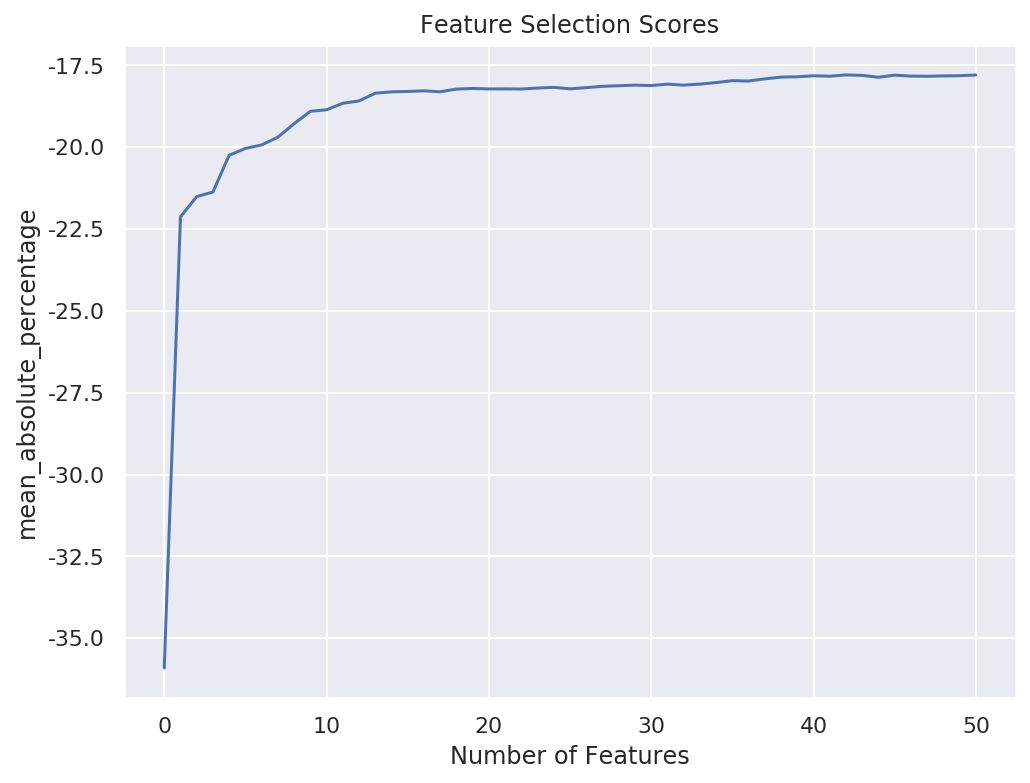

In [0]:
plt.plot(selector.grid_scores_);
plt.xlabel('Number of Features'); plt.ylabel('mean_absolute_percentage'); plt.title('Feature Selection Scores')

In [0]:
selector.n_features_

43

In [0]:
att_rankings = pd.DataFrame({'feature': list(x_df.columns), 'rank': list(selector.ranking_)}).sort_values('rank')
att_rankings

,feature,rank
0,engine,1
27,brand_name_Honda,1
28,brand_name_Hyundai,1
29,brand_name_Jaguar,1
30,brand_name_Jeep,1
31,brand_name_Land Rover,1
32,brand_name_Mahindra,1
33,brand_name_Maruti,1
34,brand_name_Mercedes-Benz,1
35,brand_name_Mini,1


In [0]:
x_selected = selector.transform(x_prepared)
selected_features = x_df.columns[np.where(selector.ranking_==1)]
x_selected_df = pd.DataFrame(x_selected, columns = selected_features)

In [0]:
x_selected_df.shape

(6016, 43)

## 4. Modeling

### Cross Validation

In [0]:
model_results_pipe2 = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    cv_scores = cross_val_score(model, train, train_labels, cv = 5, scoring=scorer)
    # cv_scores = cross_val_score(model, train, train_labels, cv = 5, scoring="neg_mean_squared_error")
    print(f'5 Fold CV Score: {round(cv_scores.mean(), 2)}, std: {round(cv_scores.std(), 2)}')

    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [0]:
model_results_pipe2 = cv_model(x_selected_df, y_labels, LinearRegression(), 'LR', model_results_pipe2)

5 Fold CV Score: -56.21, std: 4.16


In [0]:
model_results_pipe2 = cv_model(x_selected_df, y_labels, Lasso(alpha=0.01), 'Lasso_0.01', model_results_pipe2)

5 Fold CV Score: -57.43, std: 4.03


In [0]:
model_results_pipe2 = cv_model(x_selected_df, y_labels, Lasso(alpha=0.1), 'LR_Lasso_0.1', model_results_pipe2)

5 Fold CV Score: -68.22, std: 2.73


In [0]:
model_results_pipe2 = cv_model(x_selected_df, y_labels, SGDRegressor(max_iter=10000, tol=1e-5, penalty=None, random_state=42),
                         'LR_SGD', model_results_pipe2)

5 Fold CV Score: -9.413499547624151e+18, std: 9.37415536056947e+18


In [0]:
param_grid = [{"epsilon" : [0.5,1,1.5]}]
model = LinearSVR(random_state=42)
grid_search = GridSearchCV(model,param_grid,cv=3,scoring=scorer)

model_results_pipe2 = cv_model(x_selected_df, y_labels, grid_search,'Linear_SVR', model_results_pipe2)

5 Fold CV Score: -116.25, std: 64.35


In [0]:
## too long
# model = SVR(C=10, kernel="poly", gamma="auto", degree=2)
# grid_search = GridSearchCV(model,param_grid,cv=3,scoring=scorer)

# model_results_pipe2 = cv_model(x_selected_df, y_labels, grid_search,'Kernal_poly_SVR', model_results_pipe2)

In [0]:
model_results_pipe2 = cv_model(x_selected_df, y_labels, RandomForestRegressor(random_state=42, n_jobs = -1), 'RF', model_results_pipe2)

5 Fold CV Score: -17.47, std: 0.92


In [0]:
param_grid = [ 
              {"max_depth" : [3,8,10], "eta":[0.02,0.05,0.1],
              'subsample': [0.8,1], 'colsample_bytree': [0.7]}
]

xgb_reg = xgb.XGBRegressor(random_state=42,objective ='reg:squarederror')
grid_search = GridSearchCV(xgb_reg,param_grid,cv=3,
                           scoring=scorer)

grid_search.fit(x_selected_df, y_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=42, reg_alpha...bda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid=[{'colsample_bytree': [0.7], 'eta': [0.02, 0.05, 0.1],
                          'max_depth': [3, 8, 10], 'su

In [0]:
grid_search.best_params_ # 사용자 지정 중 최적 파라미터

{'colsample_bytree': 0.7, 'eta': 0.02, 'max_depth': 10, 'subsample': 0.8}

In [0]:
grid_search.best_estimator_ # 전체 중 최적 파라미터

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eta=0.02, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8, verbosity=1)

In [0]:
model_results_pipe2 = cv_model(x_selected_df, y_labels, xgb.XGBRegressor(colsample_bytree=  0.7, eta= 0.02, max_depth= 10, 
                                                       subsample= 0.8, random_state=42, n_jobs = -1), 'XGB', model_results_pipe2)

[08:50:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:50:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:50:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:50:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:50:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
5 Fold CV Score: -16.33, std: 0.91


In [0]:
model_results_pipe2

,model,cv_mean,cv_std
0,LR_SGD,-9.227036e+18,9.205505e+18
1,Linear_SVR,-1.162507e+02,6.435480e+01
2,LR_Lasso_0.1,-6.821526e+01,2.733087e+00
3,Lasso_0.01,-5.743401e+01,4.029400e+00
4,LR,-5.620842e+01,4.157815e+00
5,RF,-1.746694e+01,9.150678e-01
6,XGB,-1.633058e+01,9.148935e-01


In [0]:
model_results_pipe2[1:]

,model,cv_mean,cv_std
1,Linear_SVR,-116.250702,64.354800
2,LR_Lasso_0.1,-68.215258,2.733087
3,Lasso_0.01,-57.434013,4.029400
4,LR,-56.208415,4.157815
5,RF,-17.466943,0.915068
6,XGB,-16.330581,0.914894


In [0]:
model_results

,model,cv_mean,cv_std
0,LR_Lasso_0.1,-30.730086,0.597895
1,LR_Lasso_0.01,-24.195906,0.603783
2,Linear_SVR,-19.784916,0.897179
3,LR_SGD,-19.598515,0.534700
4,LR_OLS,-19.039122,1.004626
5,Kernal_poly_SVR,-17.808068,1.532952
6,RF,-17.058395,0.741329
7,XGB,-15.235426,0.646619


### Compare Model

Text(0.5, 1.0, 'Model Compare Results')

Text(0, 0.5, 'MAPE (with error bar)')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

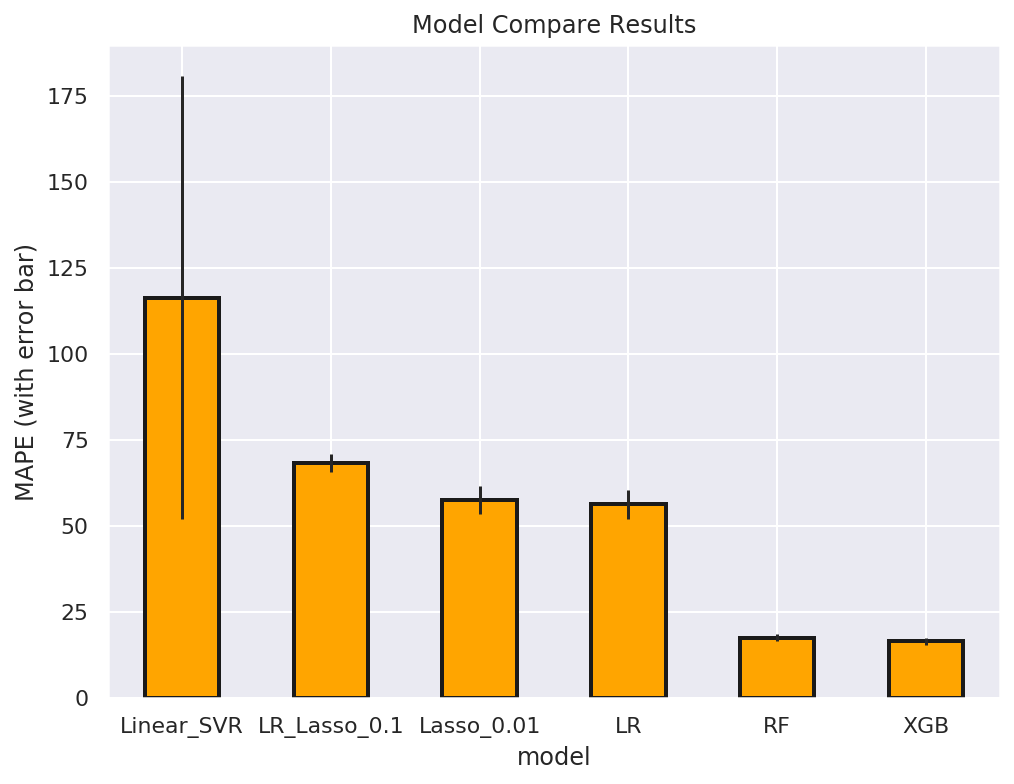

In [0]:
model_results_pipe2.set_index('model', inplace = True)
model_results_pipe2=model_results_pipe2[1:].sort_values("cv_mean")
(model_results_pipe2['cv_mean']*(-1)).plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results_pipe2['cv_std']),
                                 edgecolor = 'k', linewidth = 2)
plt.title('Model Compare Results');
plt.ylabel('MAPE (with error bar)');
plt.xticks(rotation='horizontal');
model_results_pipe2.reset_index(inplace = True)

*   scale 조절해준, pipe1에서 linear model 훨씬 더 좋음
*   Tree base 모델은 결과가 비슷하나 pipe1의 XGB가 best
